In [48]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from sklearn.metrics import precision_recall_curve
import seaborn as sns
from matplotlib import pyplot as plt
import gseapy as gp

## Precision-recall curves

### ML-GPS DOE

In [ ]:
phecodes = pd.read_excel('./Phecode/phecode_counts_v2.xlsx')
phecodes = phecodes.loc[phecodes['include'] == 'Y']['phecode']

sdu = pd.read_csv('./Datasets/sider_input.csv')
sdu = sdu.loc[sdu['phecode'].isin(phecodes)]
sdu['g-p'] = sdu['gene'] + sdu['phecode']
sdu = sdu.sort_values('phase',ascending=False).drop_duplicates('g-p')

otu = pd.read_csv('./Datasets/ot_input.csv')
otu = otu.loc[otu['phecode'].isin(phecodes)]
otu['g-p'] = otu['gene'] + otu['phecode']
otu = otu.sort_values('phase',ascending=False).drop_duplicates('g-p')

0.06506706249916616
0.09971236816874401


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


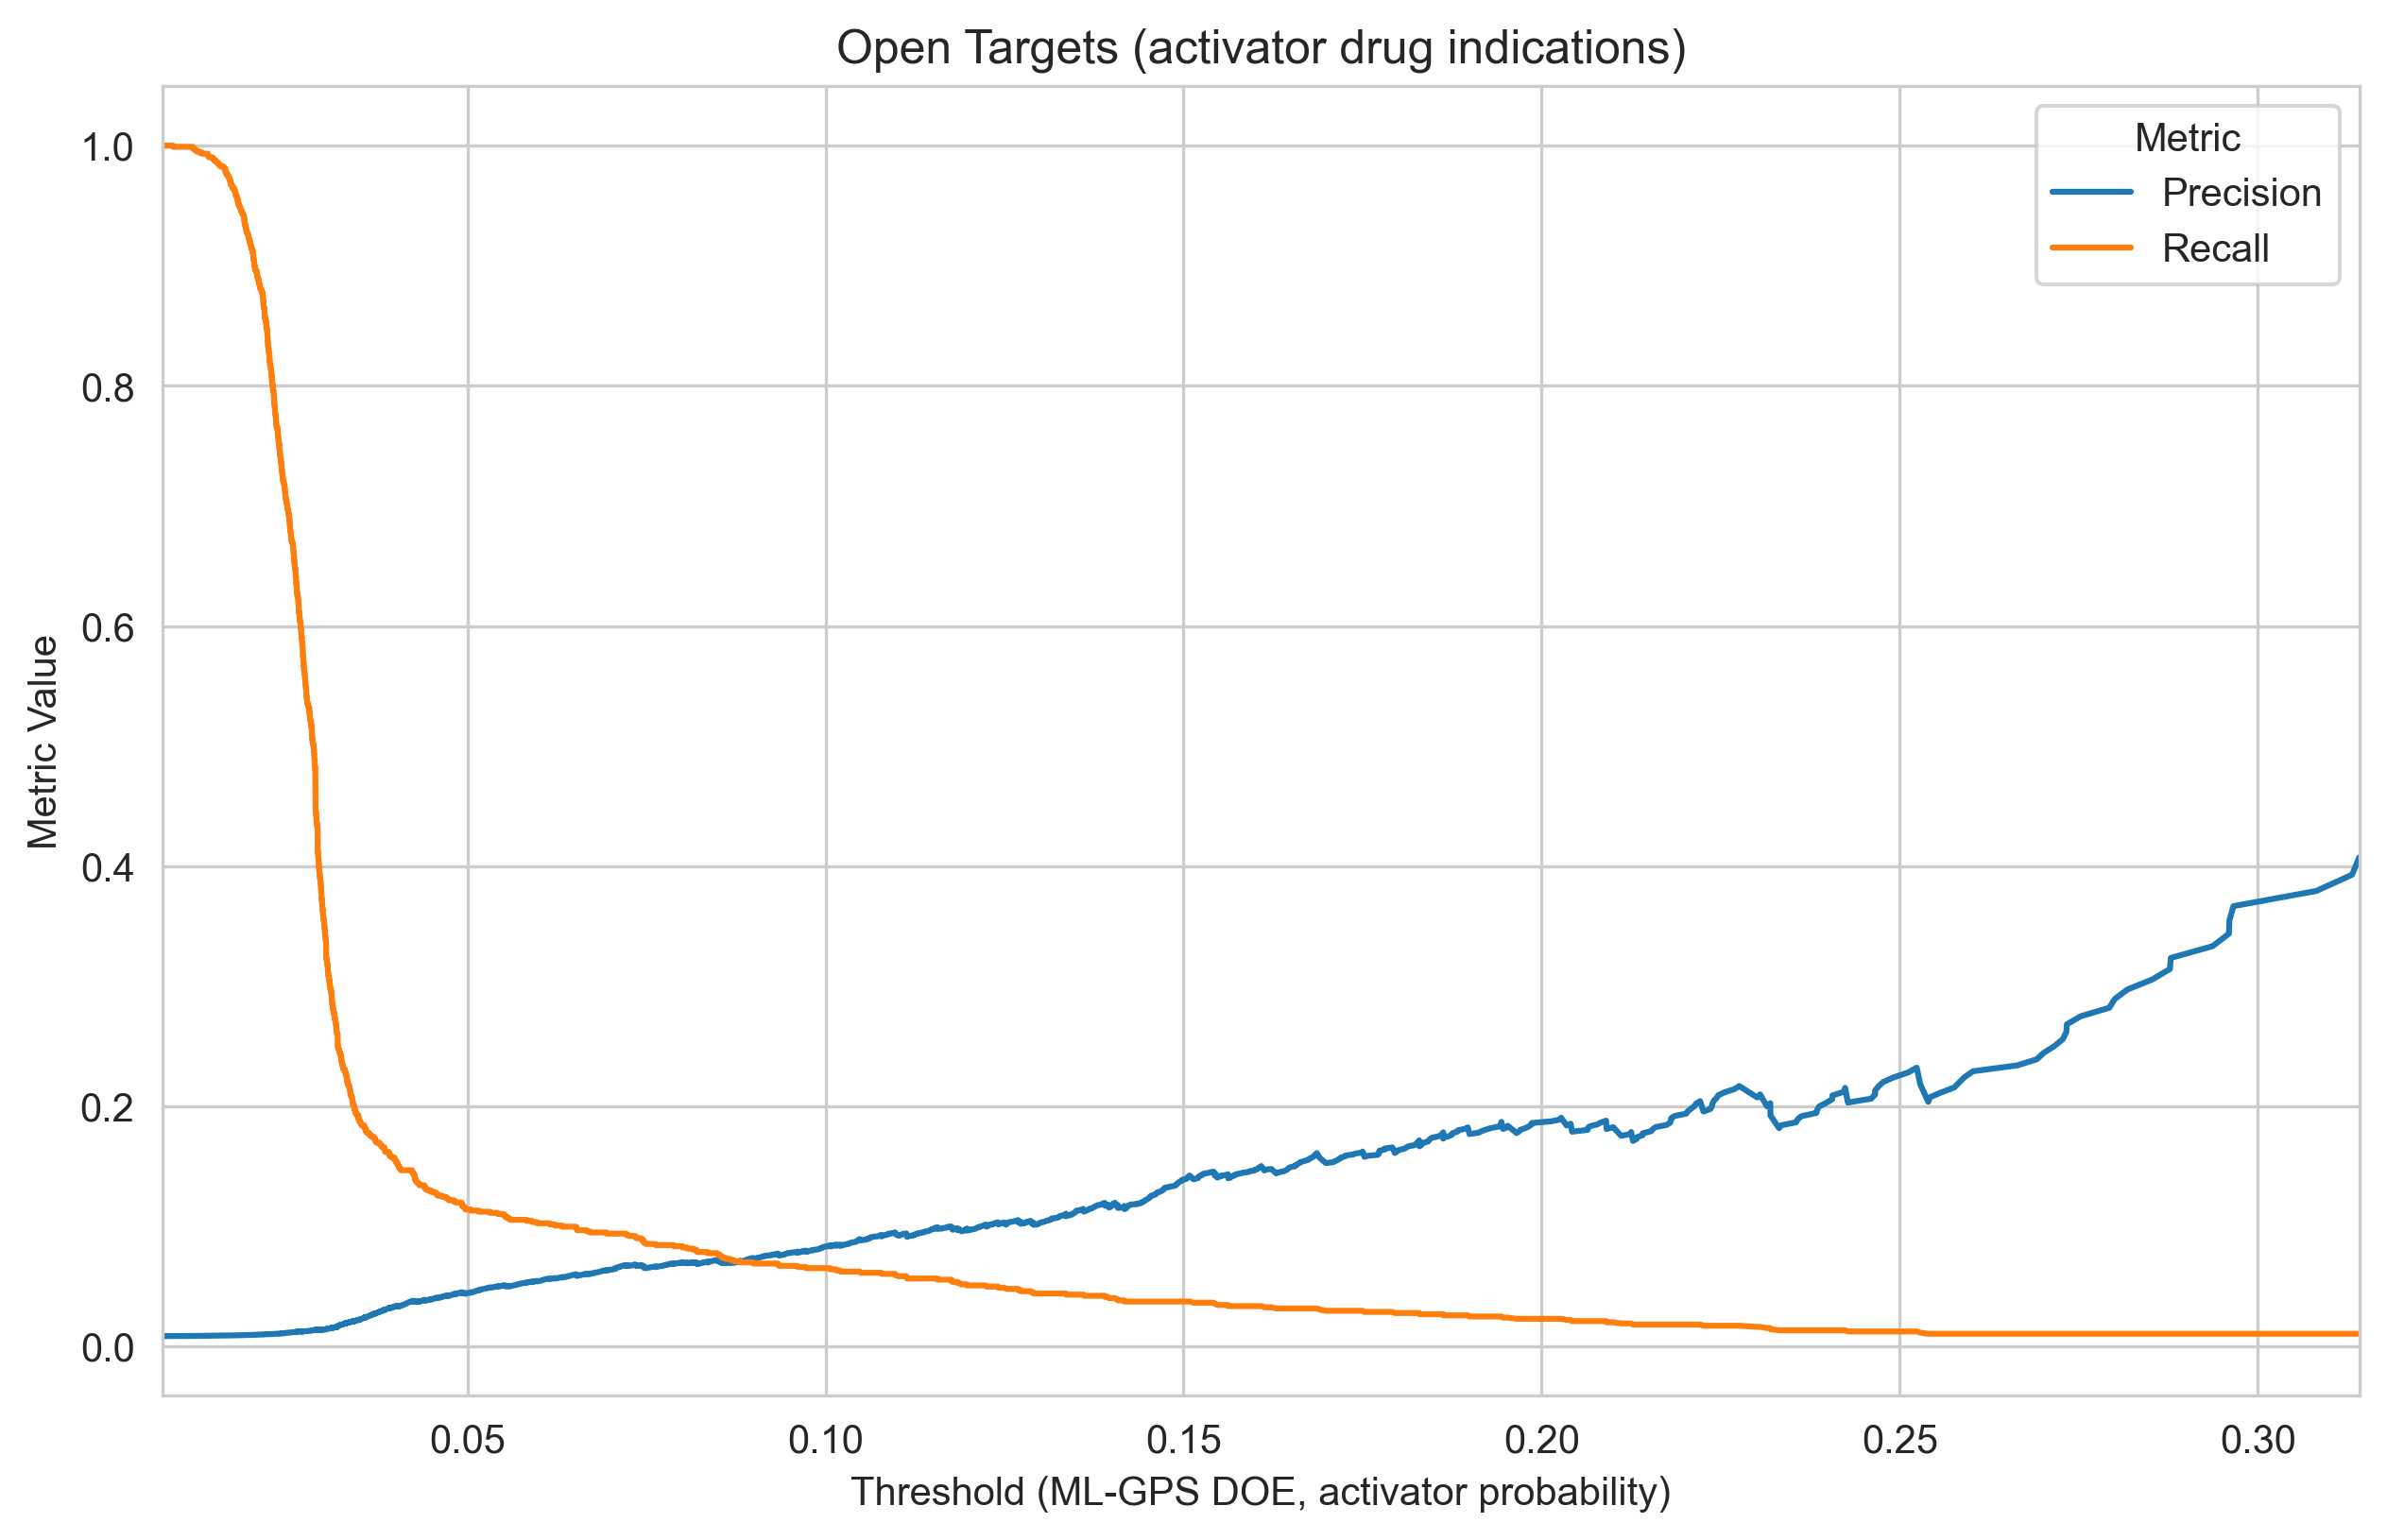

In [ ]:
prt = pd.read_pickle('./Models/Directional/hold_L2G + Clinical + PCB.pkl').groupby('g-p').mean().reset_index()
prt = prt.merge(otu[['g-p','indication','activator','inhibitor']])

#####

sns.set_style(style='whitegrid')

y_true = prt['activator']
y_scores = prt['hold_act']

precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
thresholds = np.append(thresholds, 1)

metrics_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision,
    'Recall': recall
})

metrics_df = metrics_df.loc[metrics_df['Recall'] >= 0.01]
melted_metrics_df = metrics_df.melt(id_vars='Threshold', value_vars=['Precision', 'Recall'], 
                                    var_name='Metric', value_name='Value')

desired_precision = 0.06
thresh_ot_act = metrics_df.loc[metrics_df['Precision'] >= desired_precision]['Threshold'].min()
print(thresh_ot_act)
print(metrics_df.loc[metrics_df['Precision'] >= desired_precision]['Recall'].max())

# Plot using Seaborn
plt.figure(figsize=(10, 6), dpi=300)
sns.lineplot(data=melted_metrics_df, x='Threshold', y='Value', hue='Metric')
plt.title('Open Targets (activator drug indications)')
plt.xlabel('Threshold (ML-GPS DOE, activator probability)')
plt.ylabel('Metric Value')
plt.xlim([metrics_df['Threshold'].min(),metrics_df['Threshold'].max()])
plt.show()

0.07801418439716312
0.1360824742268041


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


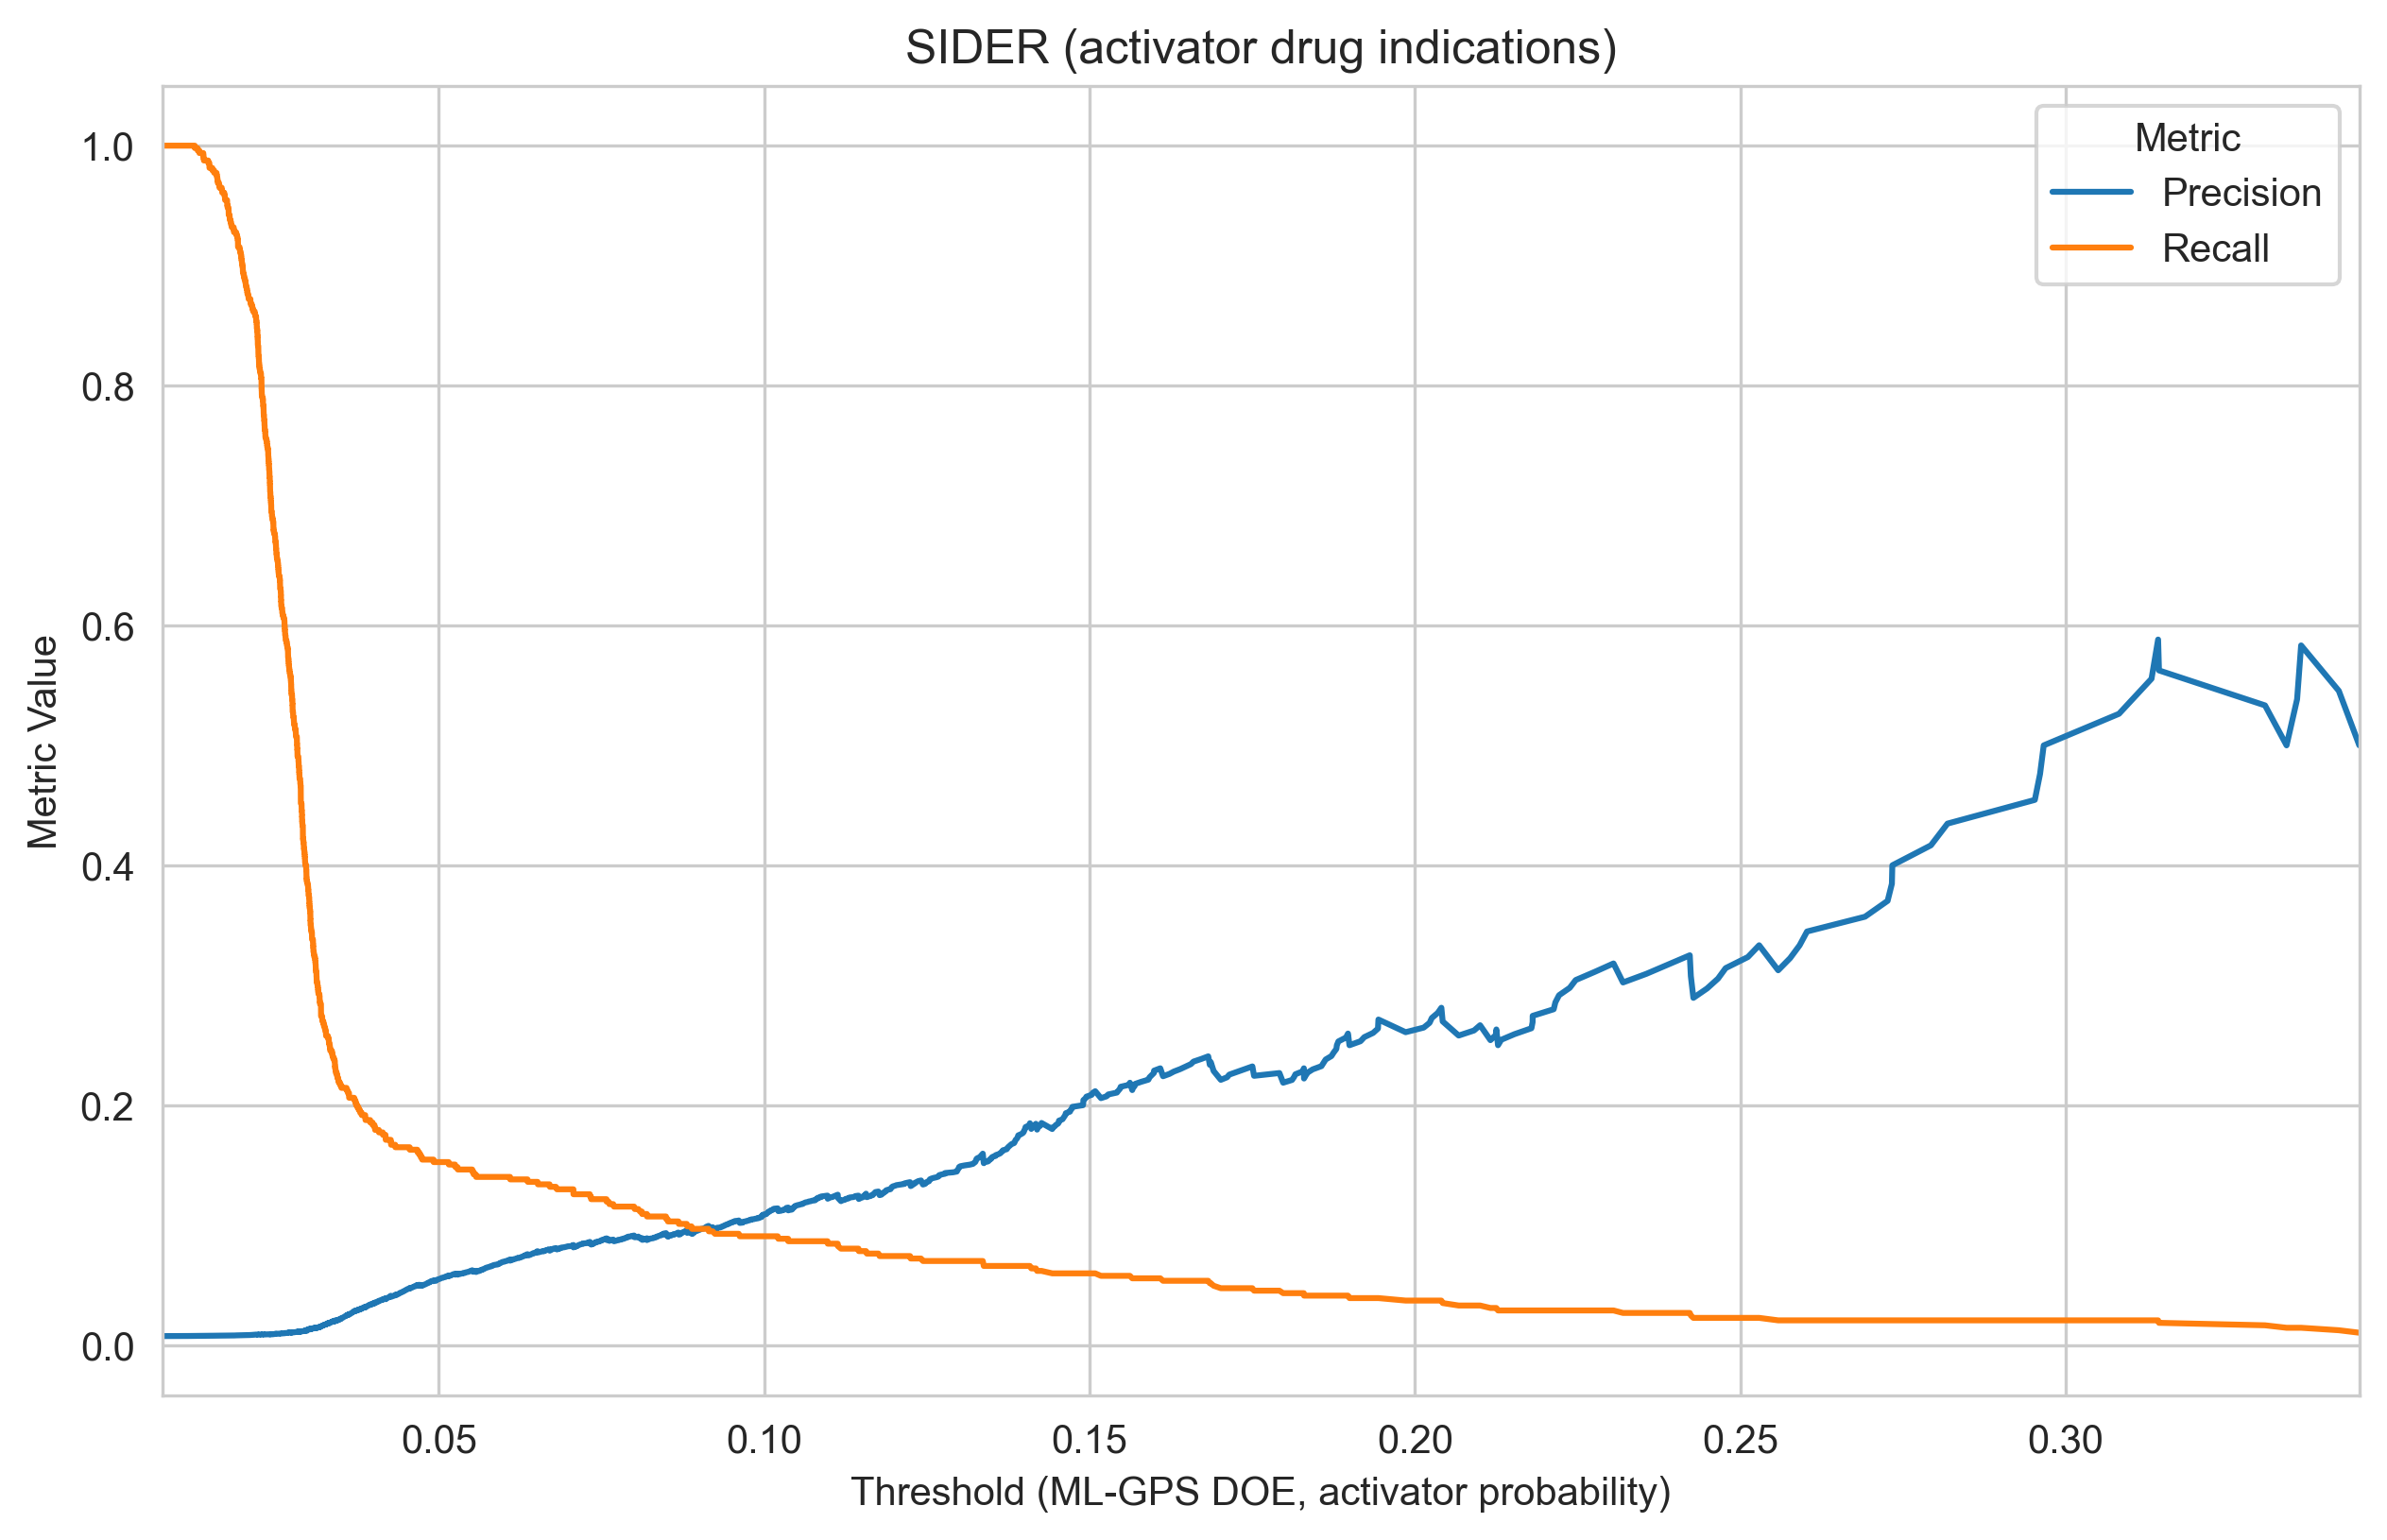

In [ ]:
prt = pd.read_pickle('./Models/Directional/out_L2G + Clinical + PCB.pkl').groupby('g-p').mean().reset_index()
prt = prt.merge(sdu[['g-p','indication','activator','inhibitor']])

#####

sns.set_style(style='whitegrid')

y_true = prt['activator']
y_scores = prt['out_act']

precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
thresholds = np.append(thresholds, 1)

metrics_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision,
    'Recall': recall
})

metrics_df = metrics_df.loc[metrics_df['Recall'] >= 0.01]
melted_metrics_df = metrics_df.melt(id_vars='Threshold', value_vars=['Precision', 'Recall'], 
                                    var_name='Metric', value_name='Value')

print(metrics_df.loc[metrics_df['Threshold'] >= thresh_ot_act]['Precision'].iloc[0])
print(metrics_df.loc[metrics_df['Threshold'] >= thresh_ot_act]['Recall'].iloc[0])

# Plot using Seaborn
plt.figure(figsize=(10, 6), dpi=300)
sns.lineplot(data=melted_metrics_df, x='Threshold', y='Value', hue='Metric')
plt.title('SIDER (activator drug indications)')
plt.xlabel('Threshold (ML-GPS DOE, activator probability)')
plt.ylabel('Metric Value')
plt.xlim([metrics_df['Threshold'].min(),metrics_df['Threshold'].max()])
plt.show()

0.21108430373867088
0.03209459459459459


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


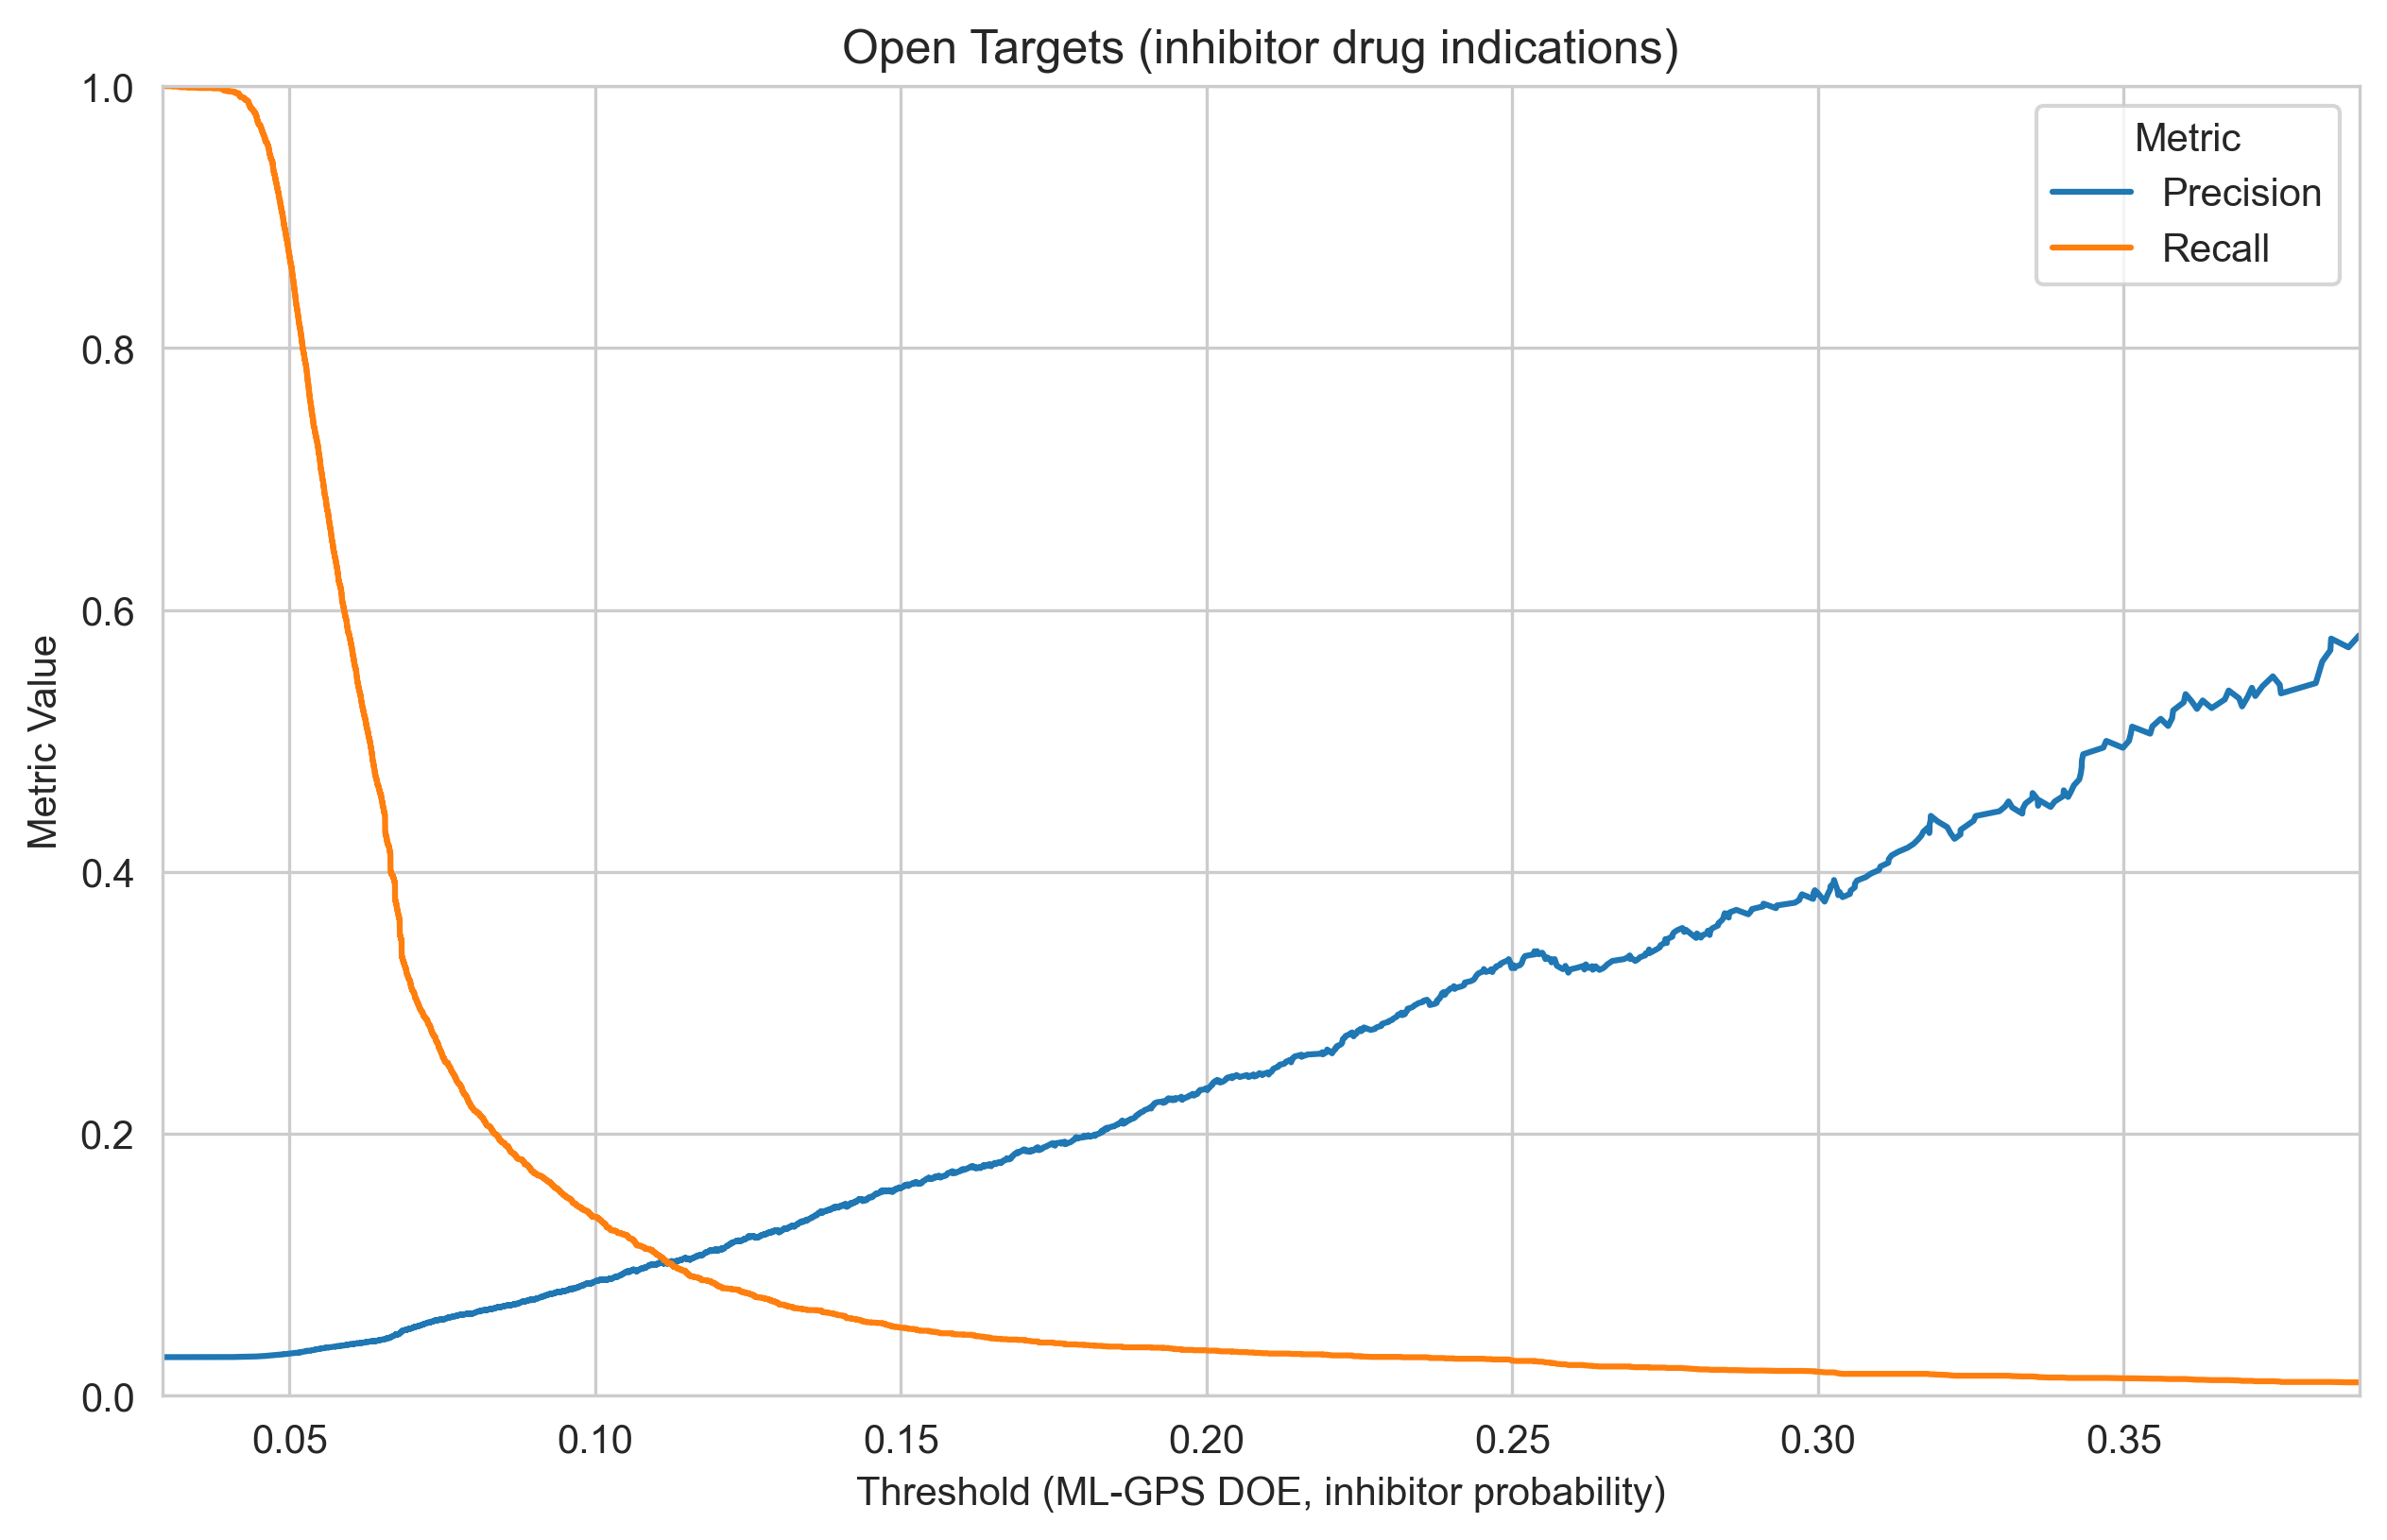

In [ ]:
prt = pd.read_pickle('./Models/Directional/hold_L2G + Clinical + PCB.pkl').groupby('g-p').mean().reset_index()
prt = prt.merge(otu[['g-p','indication','activator','inhibitor']])

#####

sns.set_style(style='whitegrid')

y_true = prt['inhibitor']
y_scores = prt['hold_inh']

precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
thresholds = np.append(thresholds, 1)

metrics_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision,
    'Recall': recall
})

metrics_df = metrics_df.loc[metrics_df['Recall'] >= 0.01]
melted_metrics_df = metrics_df.melt(id_vars='Threshold', value_vars=['Precision', 'Recall'], 
                                    var_name='Metric', value_name='Value')

desired_precision = 0.25
thresh_ot_inh = metrics_df.loc[metrics_df['Precision'] >= desired_precision]['Threshold'].min()
print(thresh_ot_inh)
print(metrics_df.loc[metrics_df['Precision'] >= desired_precision]['Recall'].max())

# Plot using Seaborn
plt.figure(figsize=(10, 6), dpi=300)
sns.lineplot(data=melted_metrics_df, x='Threshold', y='Value', hue='Metric')
plt.title('Open Targets (inhibitor drug indications)')
plt.xlabel('Threshold (ML-GPS DOE, inhibitor probability)')
plt.ylabel('Metric Value')
plt.xlim([metrics_df['Threshold'].min(),metrics_df['Threshold'].max()])
plt.ylim([0,1])
plt.show()

0.23357664233576642
0.041263700838168924


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


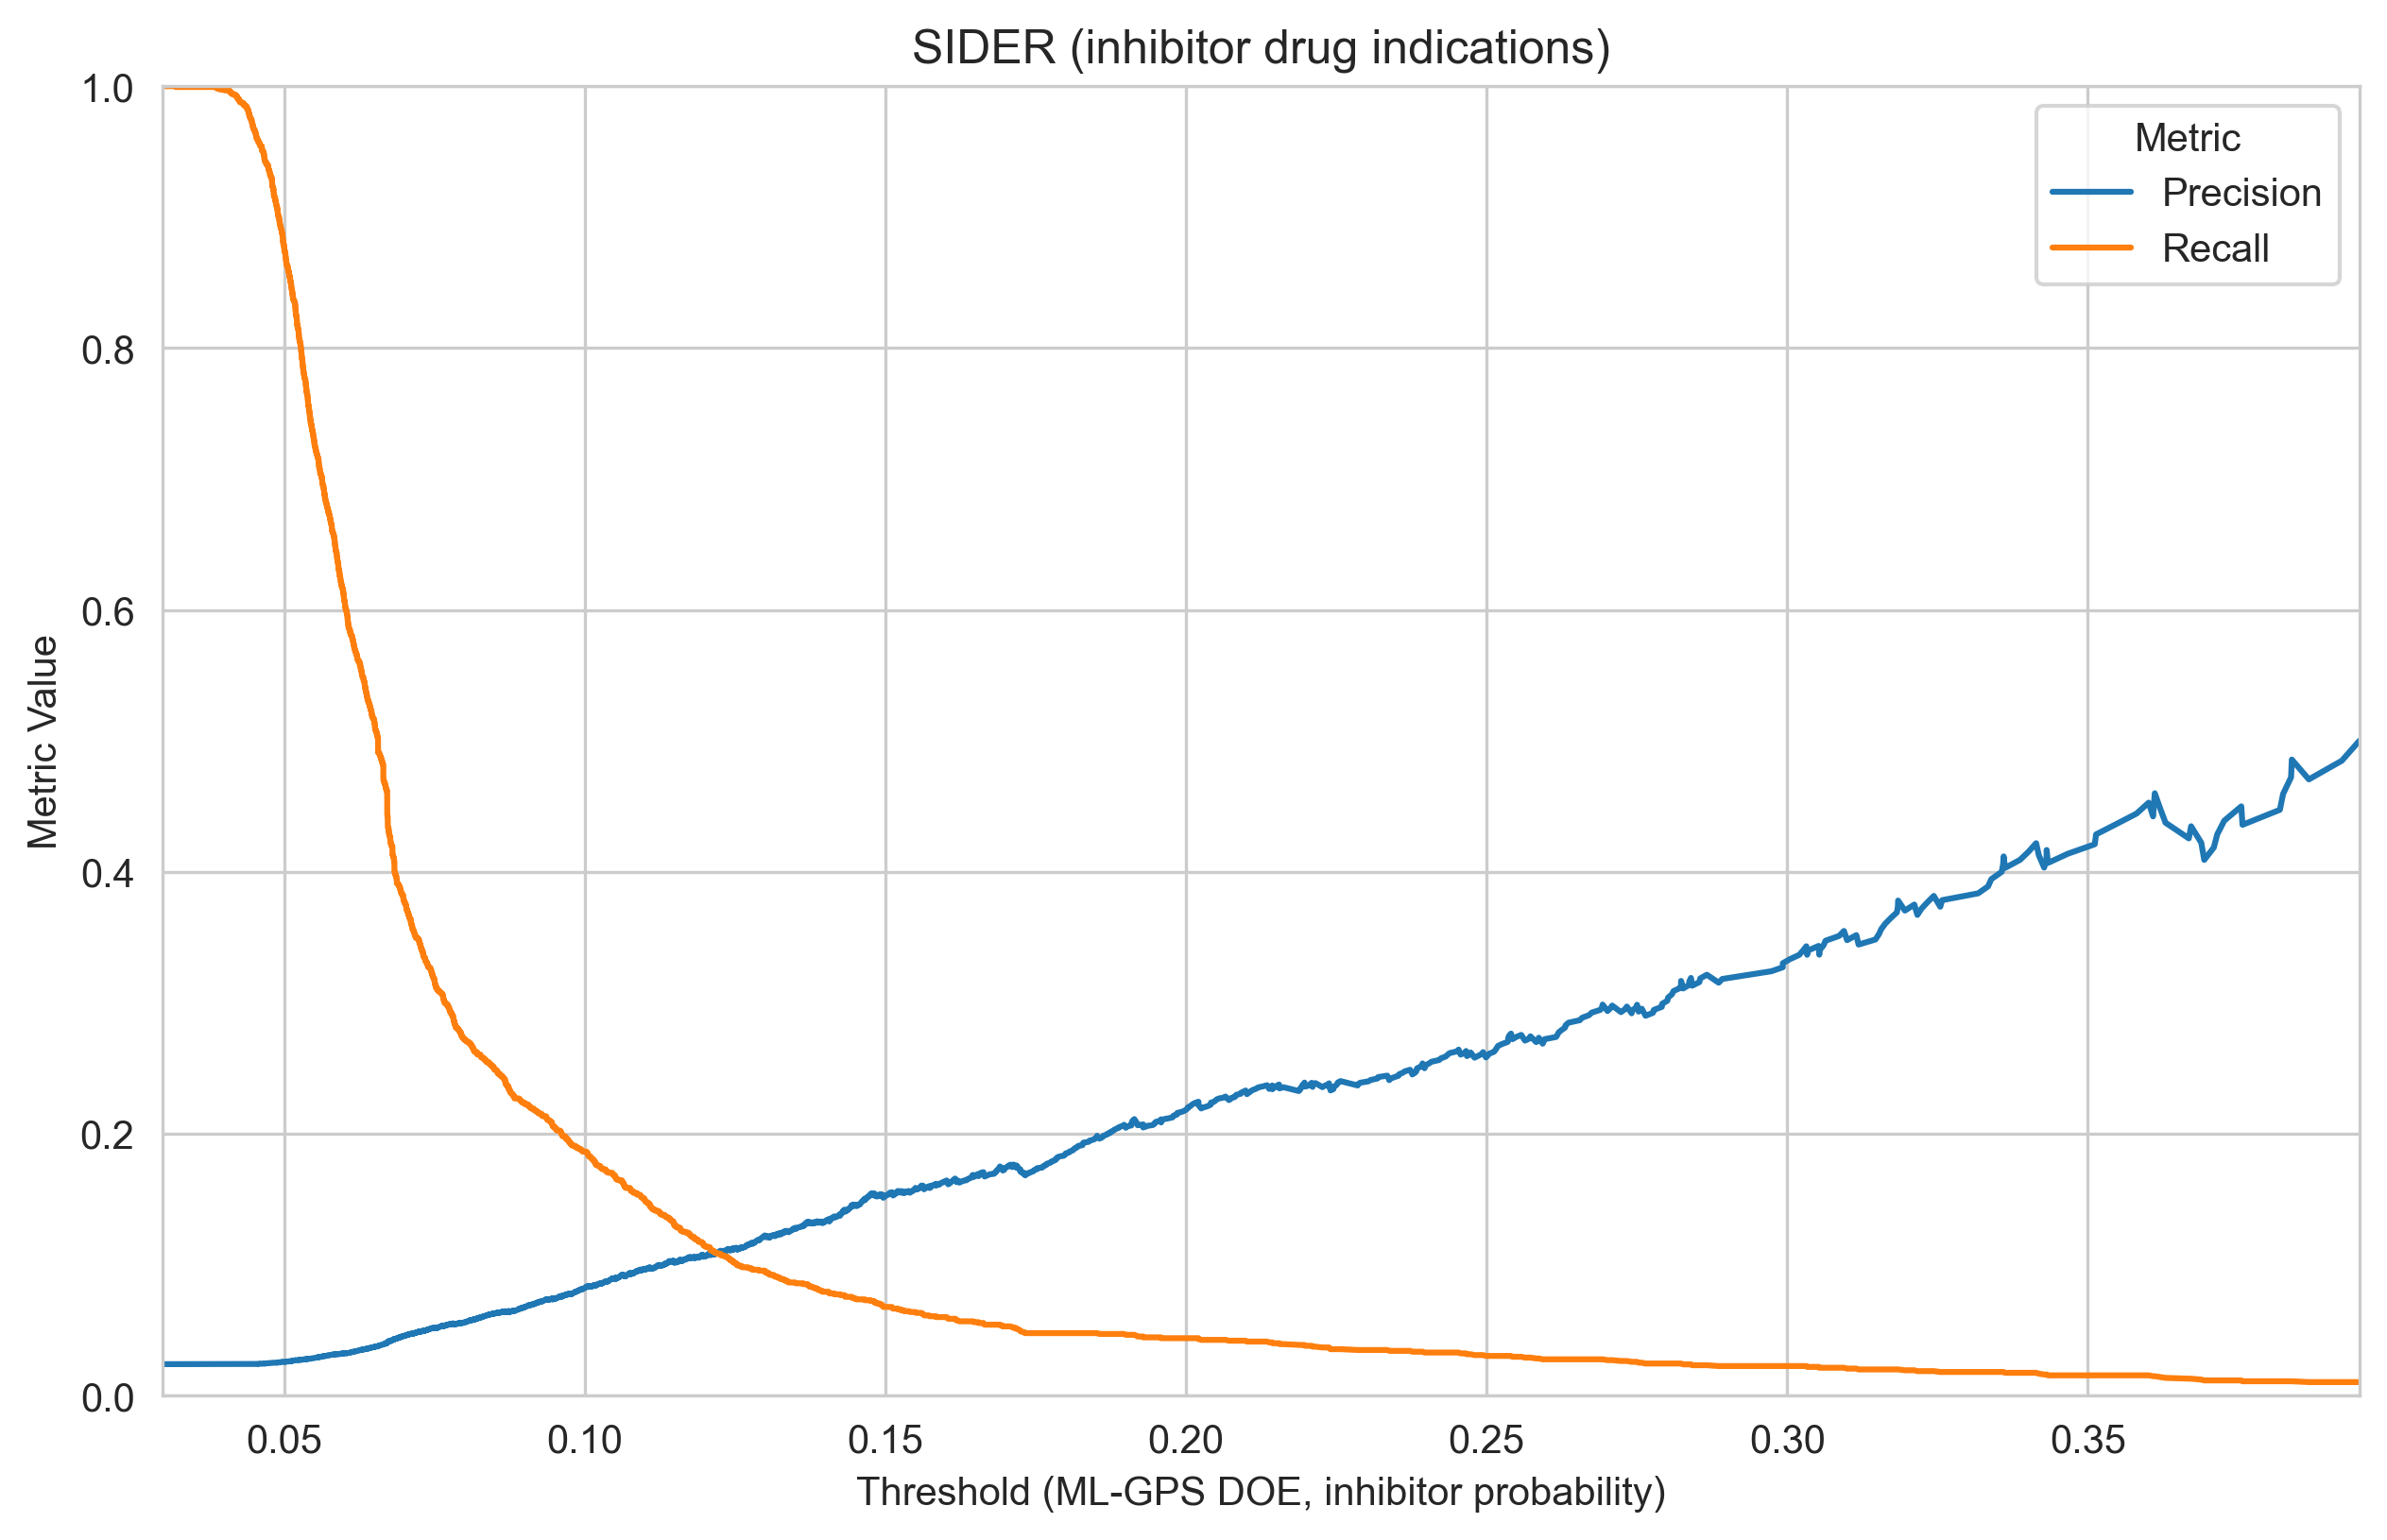

In [17]:
prt = pd.read_pickle('./Models/Directional/out_L2G + Clinical + PCB.pkl').groupby('g-p').mean().reset_index()
prt = prt.merge(sdu[['g-p','indication','activator','inhibitor']])

#####

sns.set_style(style='whitegrid')

y_true = prt['inhibitor']
y_scores = prt['out_inh']

precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
thresholds = np.append(thresholds, 1)

metrics_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision,
    'Recall': recall
})

metrics_df = metrics_df.loc[metrics_df['Recall'] >= 0.01]
melted_metrics_df = metrics_df.melt(id_vars='Threshold', value_vars=['Precision', 'Recall'], 
                                    var_name='Metric', value_name='Value')

print(metrics_df.loc[metrics_df['Threshold'] >= thresh_ot_inh]['Precision'].iloc[0])
print(metrics_df.loc[metrics_df['Threshold'] >= thresh_ot_inh]['Recall'].iloc[0])

# Plot using Seaborn
plt.figure(figsize=(10, 6), dpi=300)
sns.lineplot(data=melted_metrics_df, x='Threshold', y='Value', hue='Metric')
plt.title('SIDER (inhibitor drug indications)')
plt.xlabel('Threshold (ML-GPS DOE, inhibitor probability)')
plt.ylabel('Metric Value')
plt.xlim([metrics_df['Threshold'].min(),metrics_df['Threshold'].max()])
plt.ylim([0,1])
plt.show()

### ML-GPS (no DOE)

0.5526888578803725
0.01589565926227838
0.13839285714285715
0.10108008966782148


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


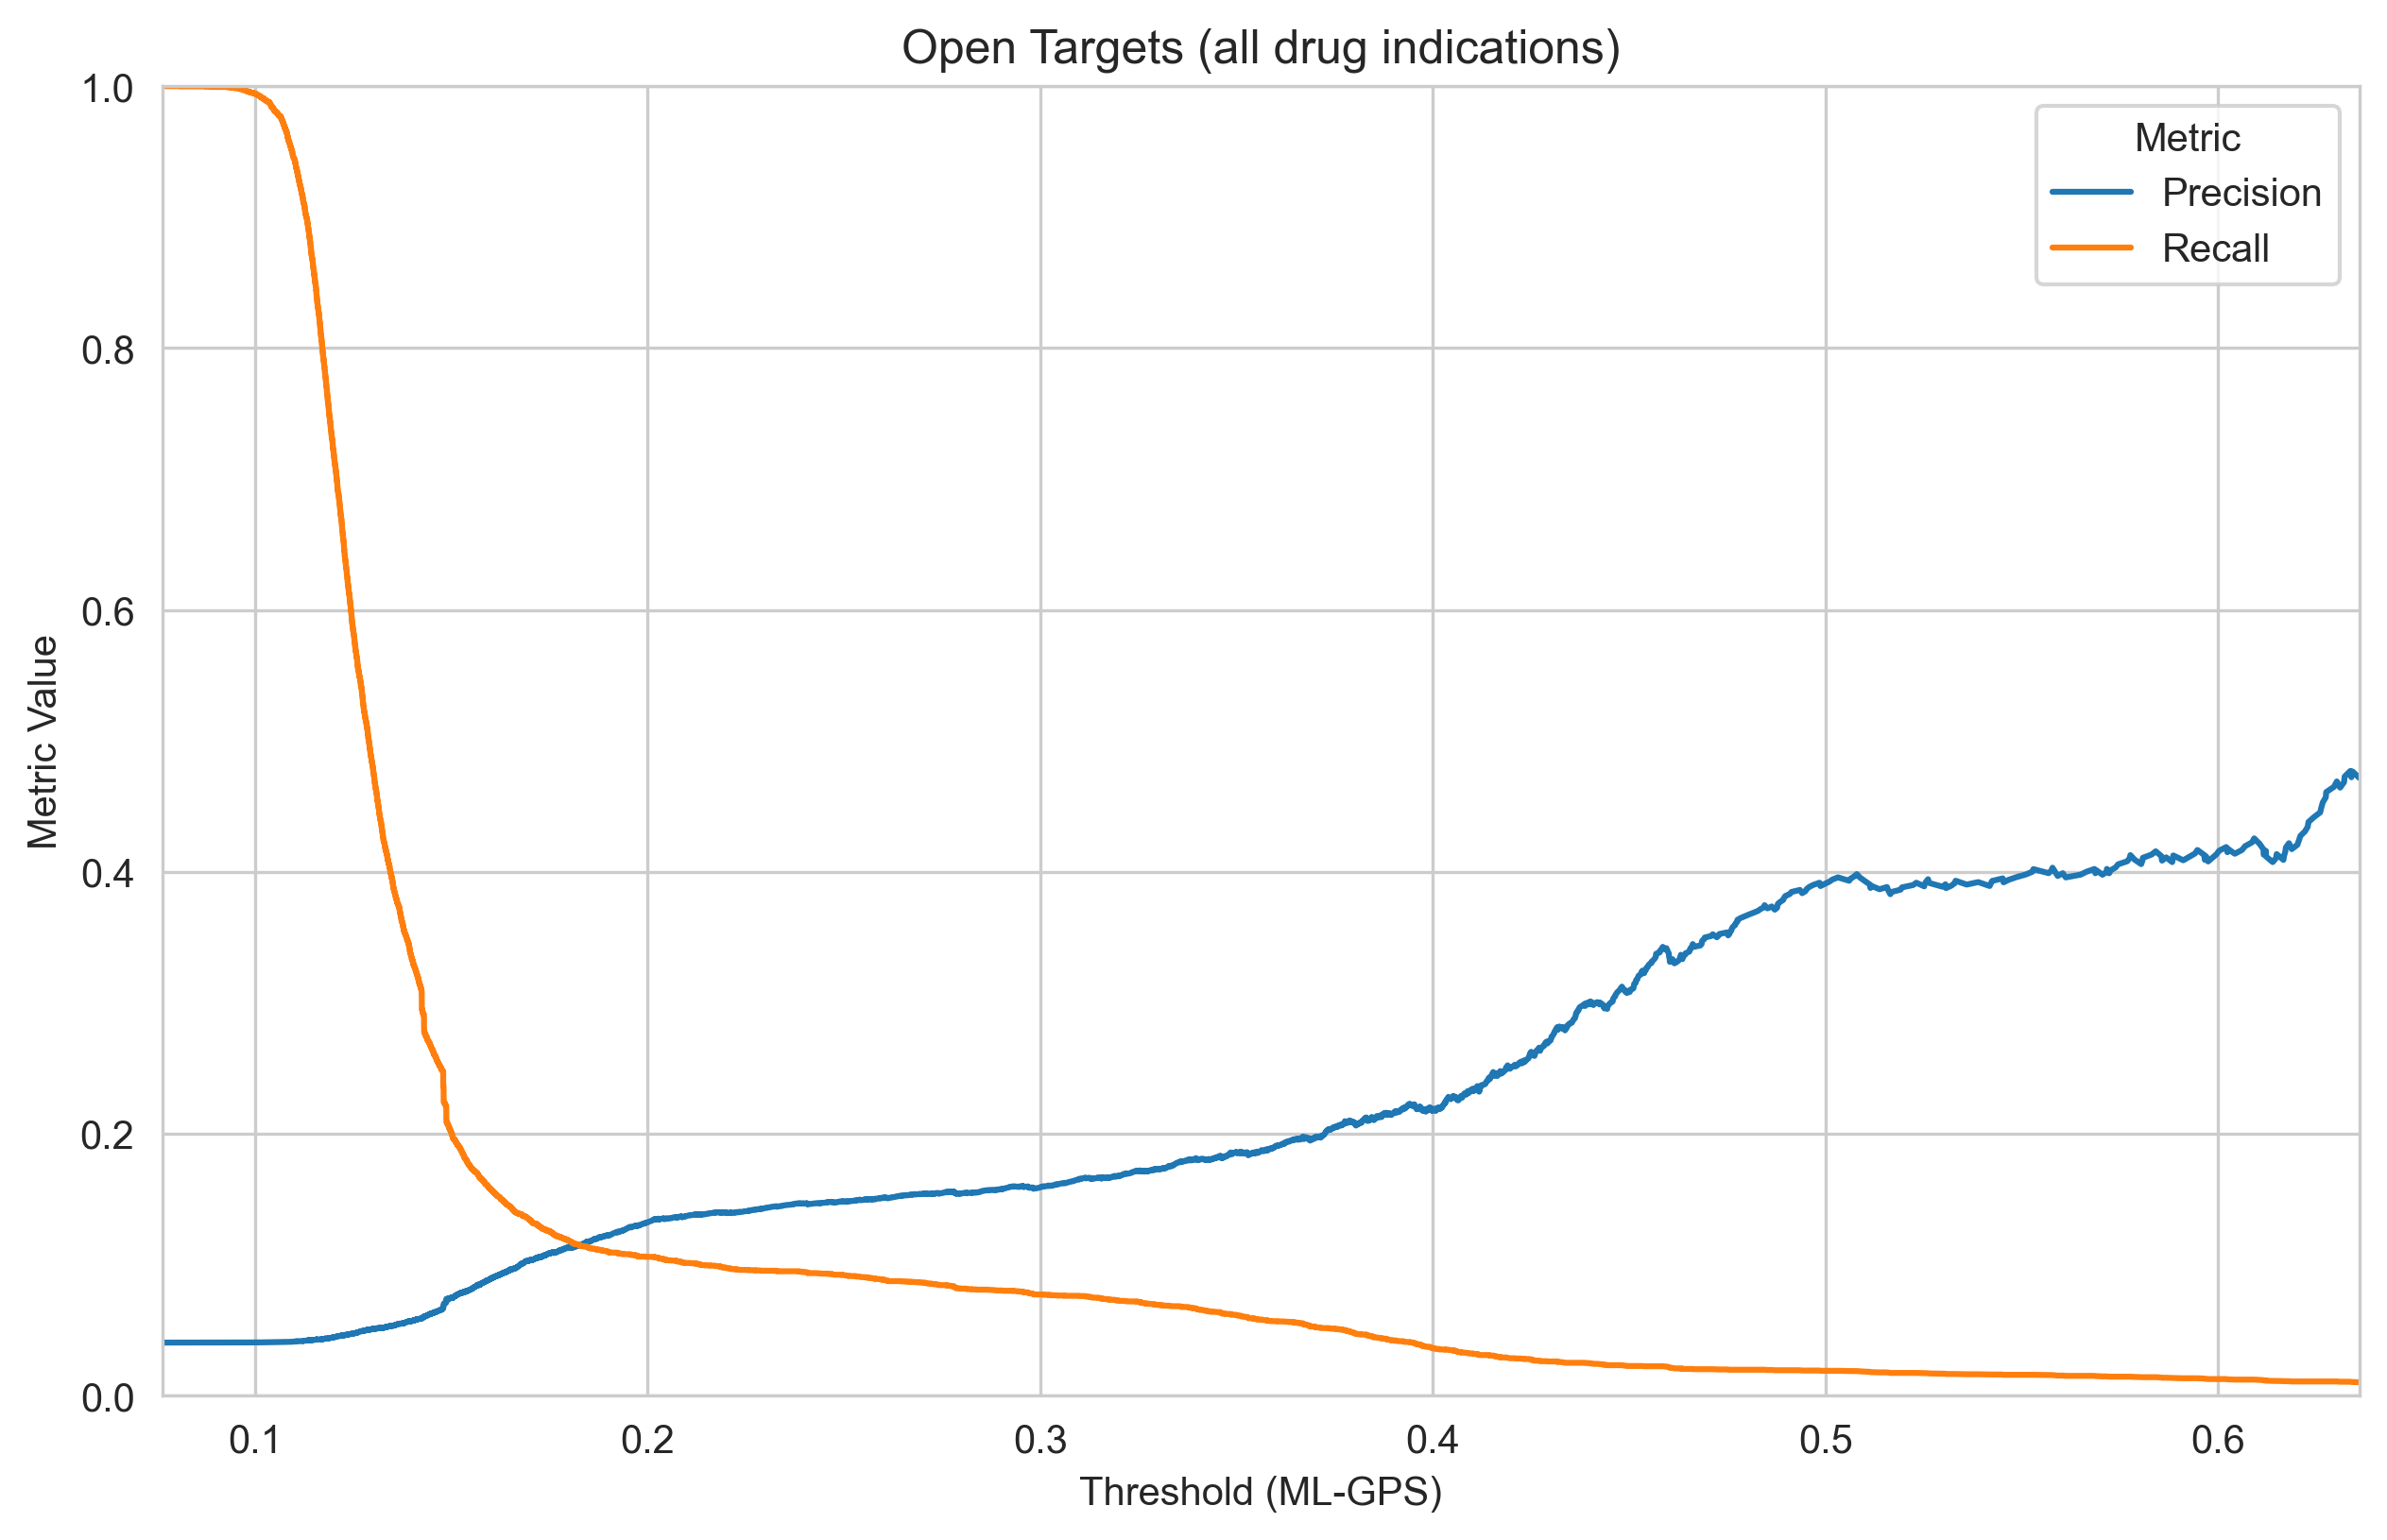

In [ ]:
prt = pd.read_pickle('./Models/Features/hold_L2G + Clinical + PCB.pkl').groupby('g-p').mean().reset_index()
prt = prt.merge(otu[['g-p','indication']])

sns.set_style(style='whitegrid')

y_true = prt['indication']
y_scores = prt['pred']

precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
thresholds = np.append(thresholds, 1)

metrics_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision,
    'Recall': recall
})

metrics_df = metrics_df.loc[metrics_df['Recall'] >= 0.01]

print(metrics_df.loc[metrics_df['Precision'] >= 0.4]['Threshold'].min())
print(metrics_df.loc[metrics_df['Precision'] >= 0.4]['Recall'].max())

print(metrics_df.loc[metrics_df['Threshold'] >= 0.212]['Precision'].iloc[0])
print(metrics_df.loc[metrics_df['Threshold'] >= 0.212]['Recall'].iloc[0])

melted_metrics_df = metrics_df.melt(id_vars='Threshold', value_vars=['Precision', 'Recall'], 
                                    var_name='Metric', value_name='Value')

# Plot using Seaborn
plt.figure(figsize=(10, 6), dpi=300)
sns.lineplot(data=melted_metrics_df, x='Threshold', y='Value', hue='Metric')
plt.title('Open Targets (all drug indications)')
plt.xlabel('Threshold (ML-GPS)')
plt.ylabel('Metric Value')
plt.xlim([metrics_df['Threshold'].min(),metrics_df['Threshold'].max()])
plt.ylim([0,1])
plt.show()

0.4536082474226804
0.018084669132757913
0.16507580011229647
0.12083847102342787


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


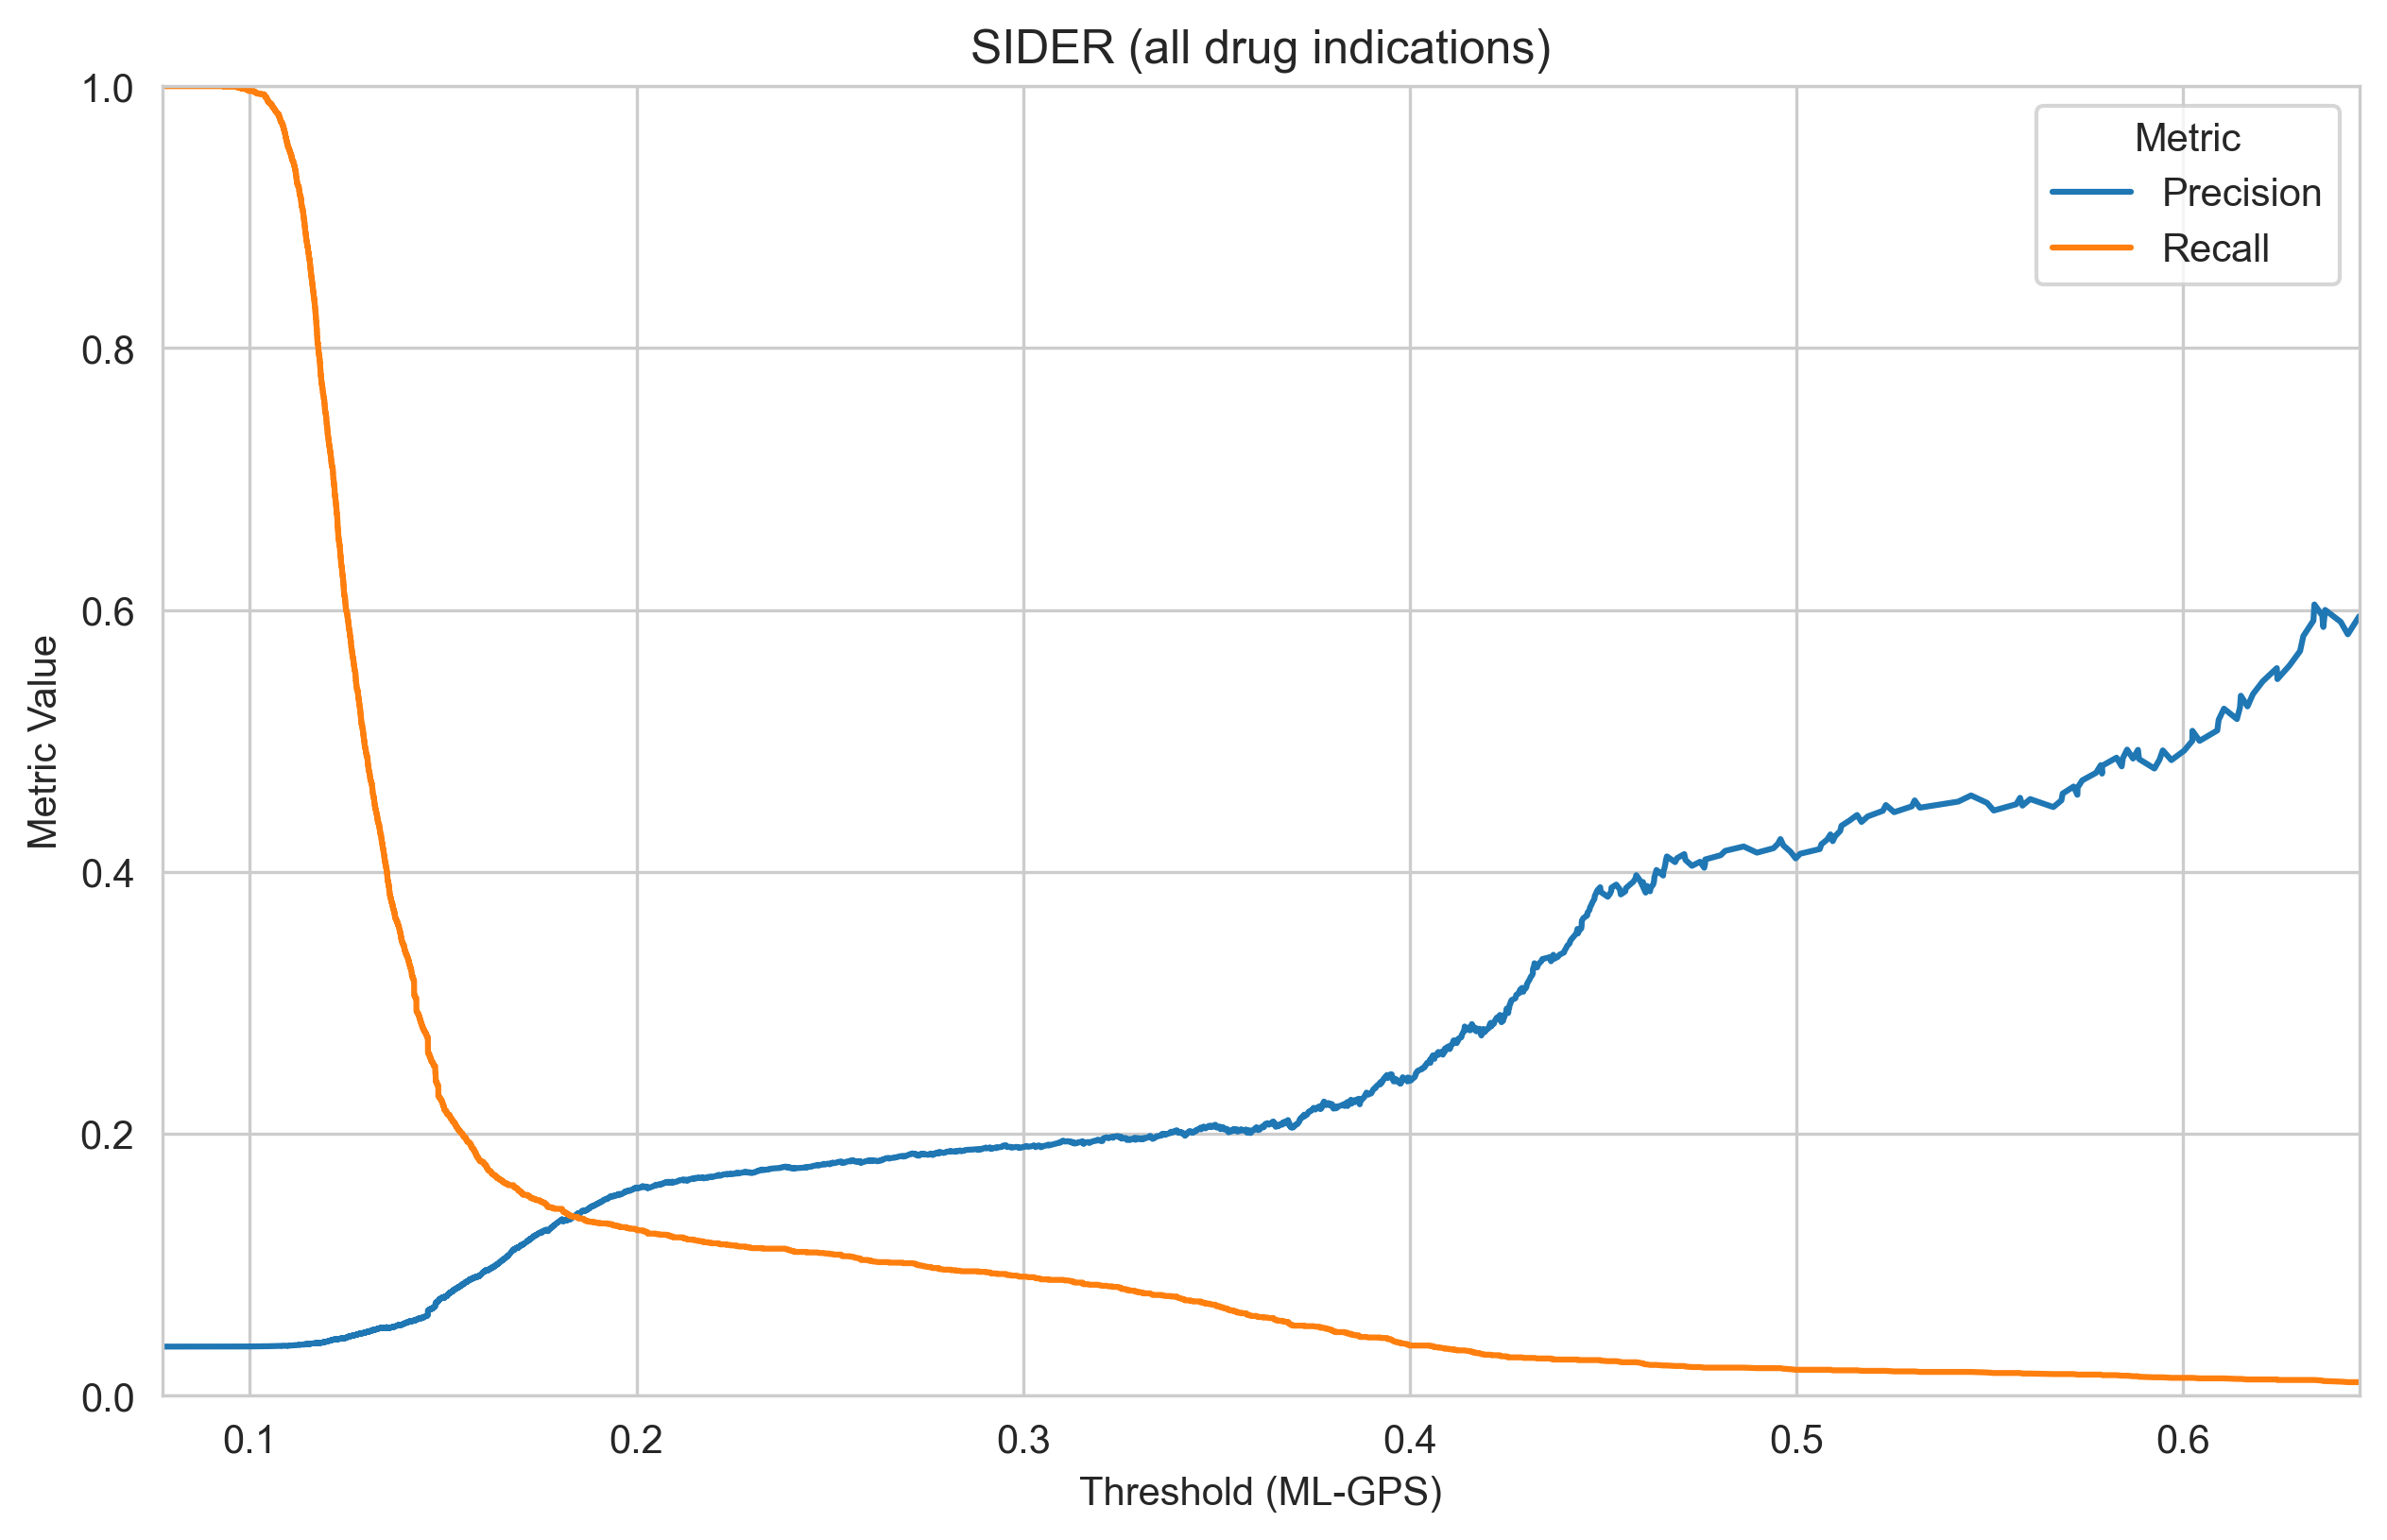

In [23]:
prt = pd.read_pickle('./Models/Features/out_L2G + Clinical + PCB.pkl').groupby('g-p').mean().reset_index()
prt = prt.merge(sdu[['g-p','indication']])

sns.set_style(style='whitegrid')

y_true = prt['indication']
y_scores = prt['pred']

precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
thresholds = np.append(thresholds, 1)

metrics_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision,
    'Recall': recall
})

metrics_df = metrics_df.loc[metrics_df['Recall'] >= 0.01]
melted_metrics_df = metrics_df.melt(id_vars='Threshold', value_vars=['Precision', 'Recall'], 
                                    var_name='Metric', value_name='Value')

print(metrics_df.loc[metrics_df['Threshold'] >= 0.540472052743579]['Precision'].iloc[0])
print(metrics_df.loc[metrics_df['Threshold'] >= 0.540472052743579]['Recall'].iloc[0])

print(metrics_df.loc[metrics_df['Threshold'] >= 0.212]['Precision'].iloc[0])
print(metrics_df.loc[metrics_df['Threshold'] >= 0.212]['Recall'].iloc[0])


# Plot using Seaborn
plt.figure(figsize=(10, 6), dpi=300)
sns.lineplot(data=melted_metrics_df, x='Threshold', y='Value', hue='Metric')
plt.title('SIDER (all drug indications)')
plt.xlabel('Threshold (ML-GPS)')
plt.ylabel('Metric Value')
plt.xlim([metrics_df['Threshold'].min(),metrics_df['Threshold'].max()])
plt.ylim([0,1])
plt.show()

## Generating predictions file

In [25]:
sdu = pd.read_csv('./Datasets/sider_input.csv')
otu = pd.read_csv('./Datasets/ot_input.csv')
agp = pd.read_csv('./Datasets/all_gp.csv')

phecodes = pd.read_excel('./Phecode/phecode_counts_v2.xlsx')
phecodes = phecodes.loc[phecodes['include'] == 'Y']['phecode']

sdu = sdu.loc[sdu['phecode'].isin(phecodes)]
otu = otu.loc[otu['phecode'].isin(phecodes)]
agp = agp.loc[agp['phecode'].isin(phecodes)]

sdu['g-p'] = sdu['gene'] + sdu['phecode']
otu['g-p'] = otu['gene'] + otu['phecode']
agp['g-p'] = agp['gene'] + agp['phecode']

drugs = pd.concat([sdu,otu])[['g-p','indication','phase','activator','inhibitor']].sort_values('phase',ascending=False).drop_duplicates('g-p')

p_pred = pd.read_pickle('./Models/Features/pred_L2G + Clinical + P.pkl').rename({'pred':'p'},axis=1)
pcb_pred = pd.read_pickle('./Models/Features/pred_L2G + Clinical + PCB.pkl').rename({'pred':'pcb'},axis=1)
p_pred = p_pred.groupby('g-p').mean().reset_index()
pcb_pred = pcb_pred.groupby('g-p').mean().reset_index()

pred = p_pred.merge(pcb_pred, on='g-p').merge(drugs, on='g-p', how='left')

ass = pd.read_pickle('./Cleaned files/association_scores_cleaned.pkl')
ass['g-p'] = ass['gene'] + ass['phecode']
pred = pred.merge(ass.drop(['gene','phecode'],axis=1), on='g-p', how='left')

pred = pred.merge(agp[['g-p','gene','phecode']].drop_duplicates(), how='left')

pred['diff'] = pred['pcb'] - pred['p']
pred['direct'] = 0
pred.loc[pred['direct_score'].notna(), 'direct'] = 1
pred['indirect'] = 0
pred.loc[pred['indirect_score'].notna(), 'indirect'] = 1

pcb_dir = pd.read_pickle('./Models/Directional/pred_L2G + Clinical + PCB.pkl').groupby('g-p').mean().reset_index()
p_dir = pd.read_pickle('./Models/Directional/pred_L2G + Clinical + P.pkl').groupby('g-p').mean().reset_index()

pcb_dir = pcb_dir.set_axis(['g-p','pcb_none','pcb_inh','pcb_act'],axis=1)
p_dir = p_dir.set_axis(['g-p','p_none','p_inh','p_act'],axis=1)

pred = pred.merge(p_dir, how='left').merge(pcb_dir, how='left')
pred.to_pickle('./Outputs/pred.pkl')

## Comparing ML-GPS to L2G + Clinical + P

In [29]:
pred = pd.read_pickle('./Outputs/pred.pkl')

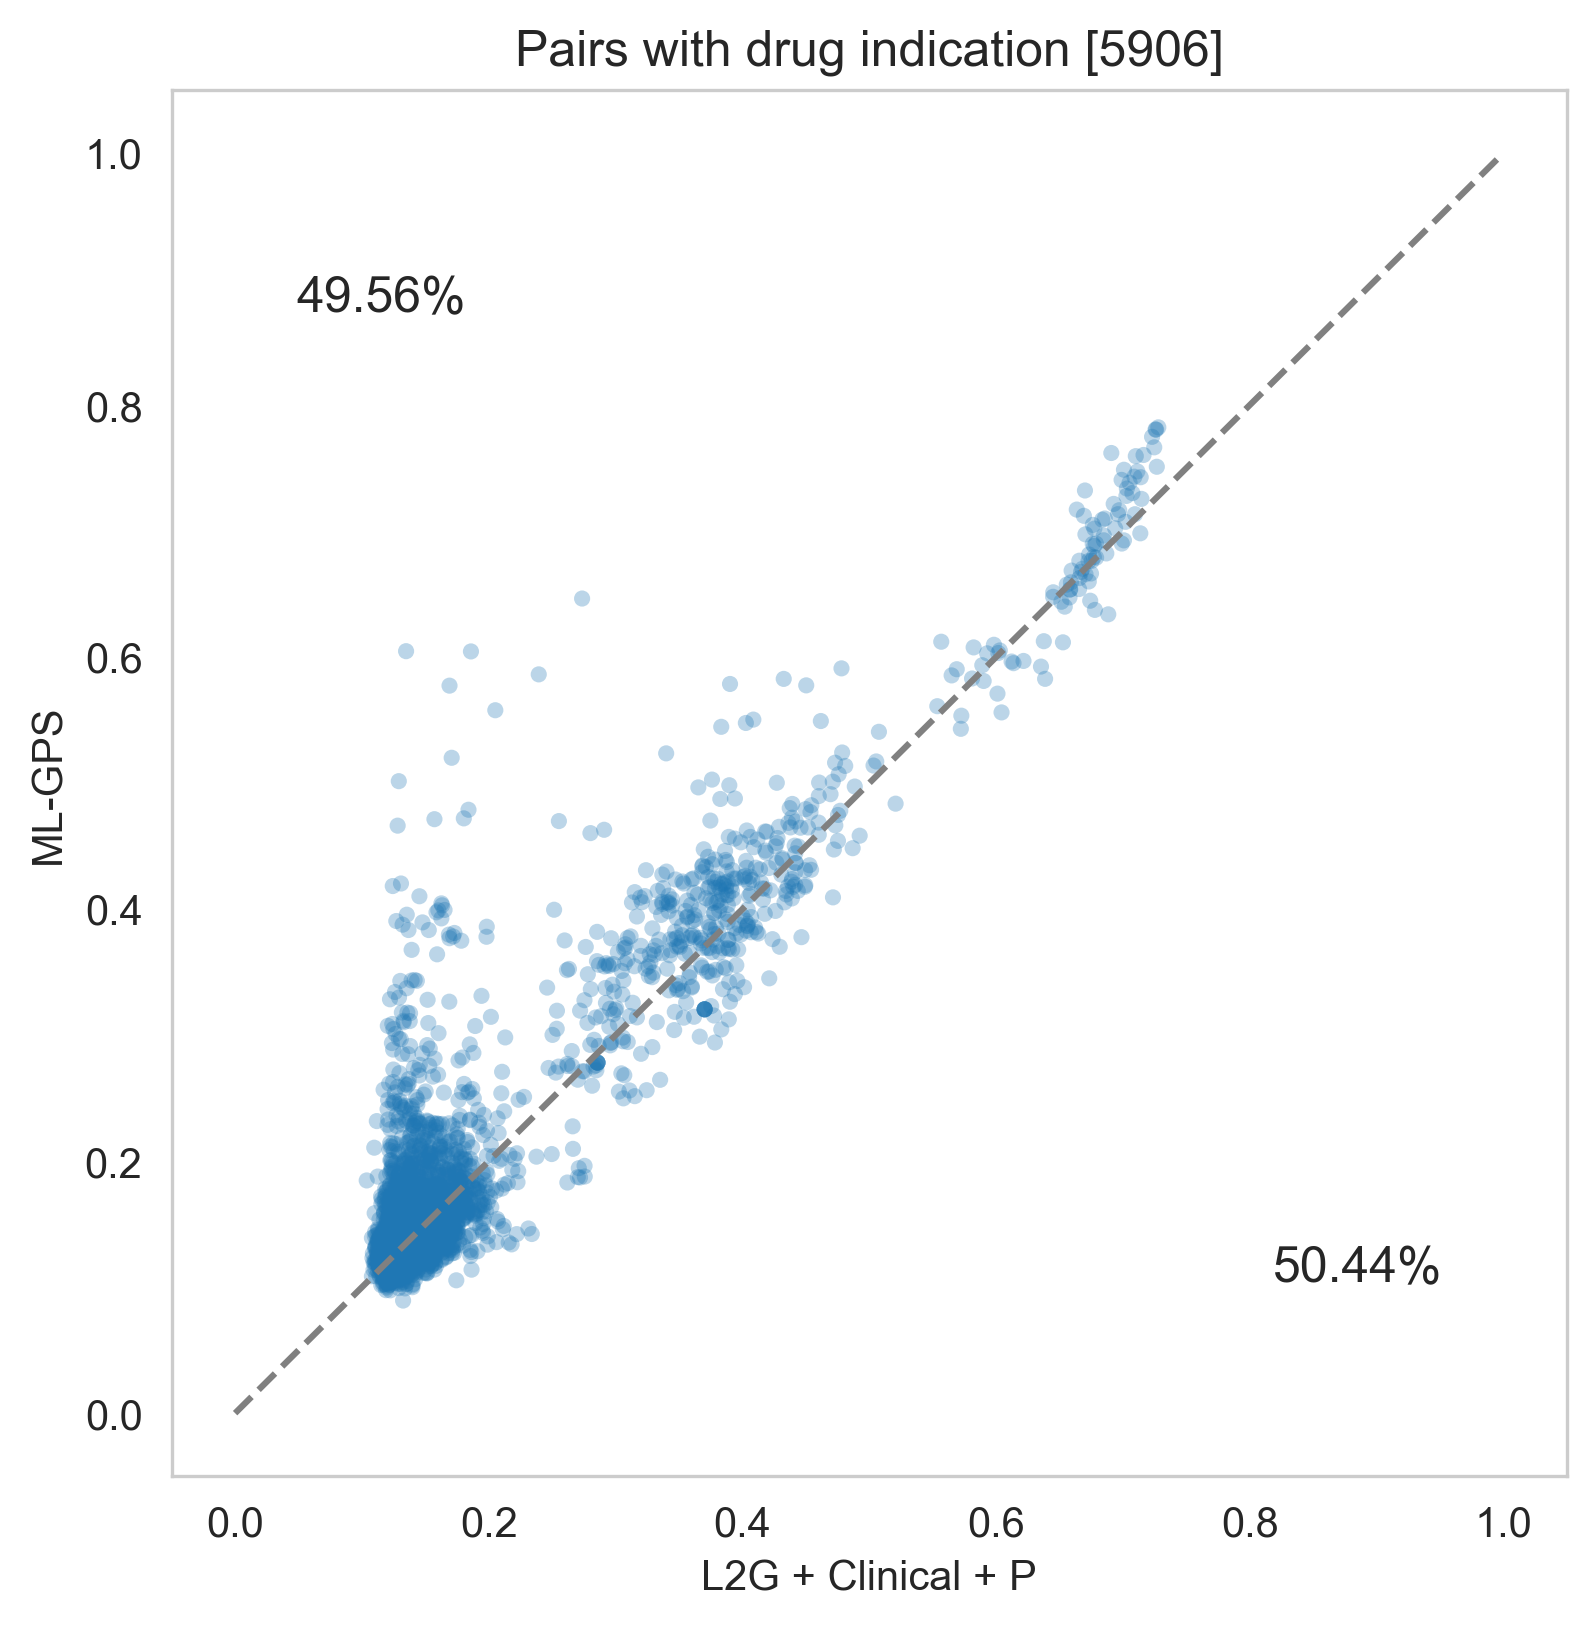

In [39]:
sns.set_style(style='whitegrid')

temp = pred.loc[pred['indication'] == 1]

plt.figure(figsize=(6, 6), dpi=300)

sns.scatterplot(data=temp, x='p', y='pcb', alpha=0.3, edgecolor='none', s=15)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

above_line = ((temp['pcb'] - temp['p']) > 0).mean() * 100
below_line = ((temp['pcb'] - temp['p']) < 0).mean() * 100

plt.text(0.15, 0.85, f'{above_line:.2f}%', transform=plt.gca().transAxes, ha='center', va='center', fontsize=12)
plt.text(0.85, 0.15, f'{below_line:.2f}%', transform=plt.gca().transAxes, ha='center', va='center', fontsize=12)

plt.ylabel('ML-GPS')
plt.xlabel('L2G + Clinical + P')

plt.title(f'Pairs with drug indication [{len(temp)}]')

plt.grid(False)
plt.show()

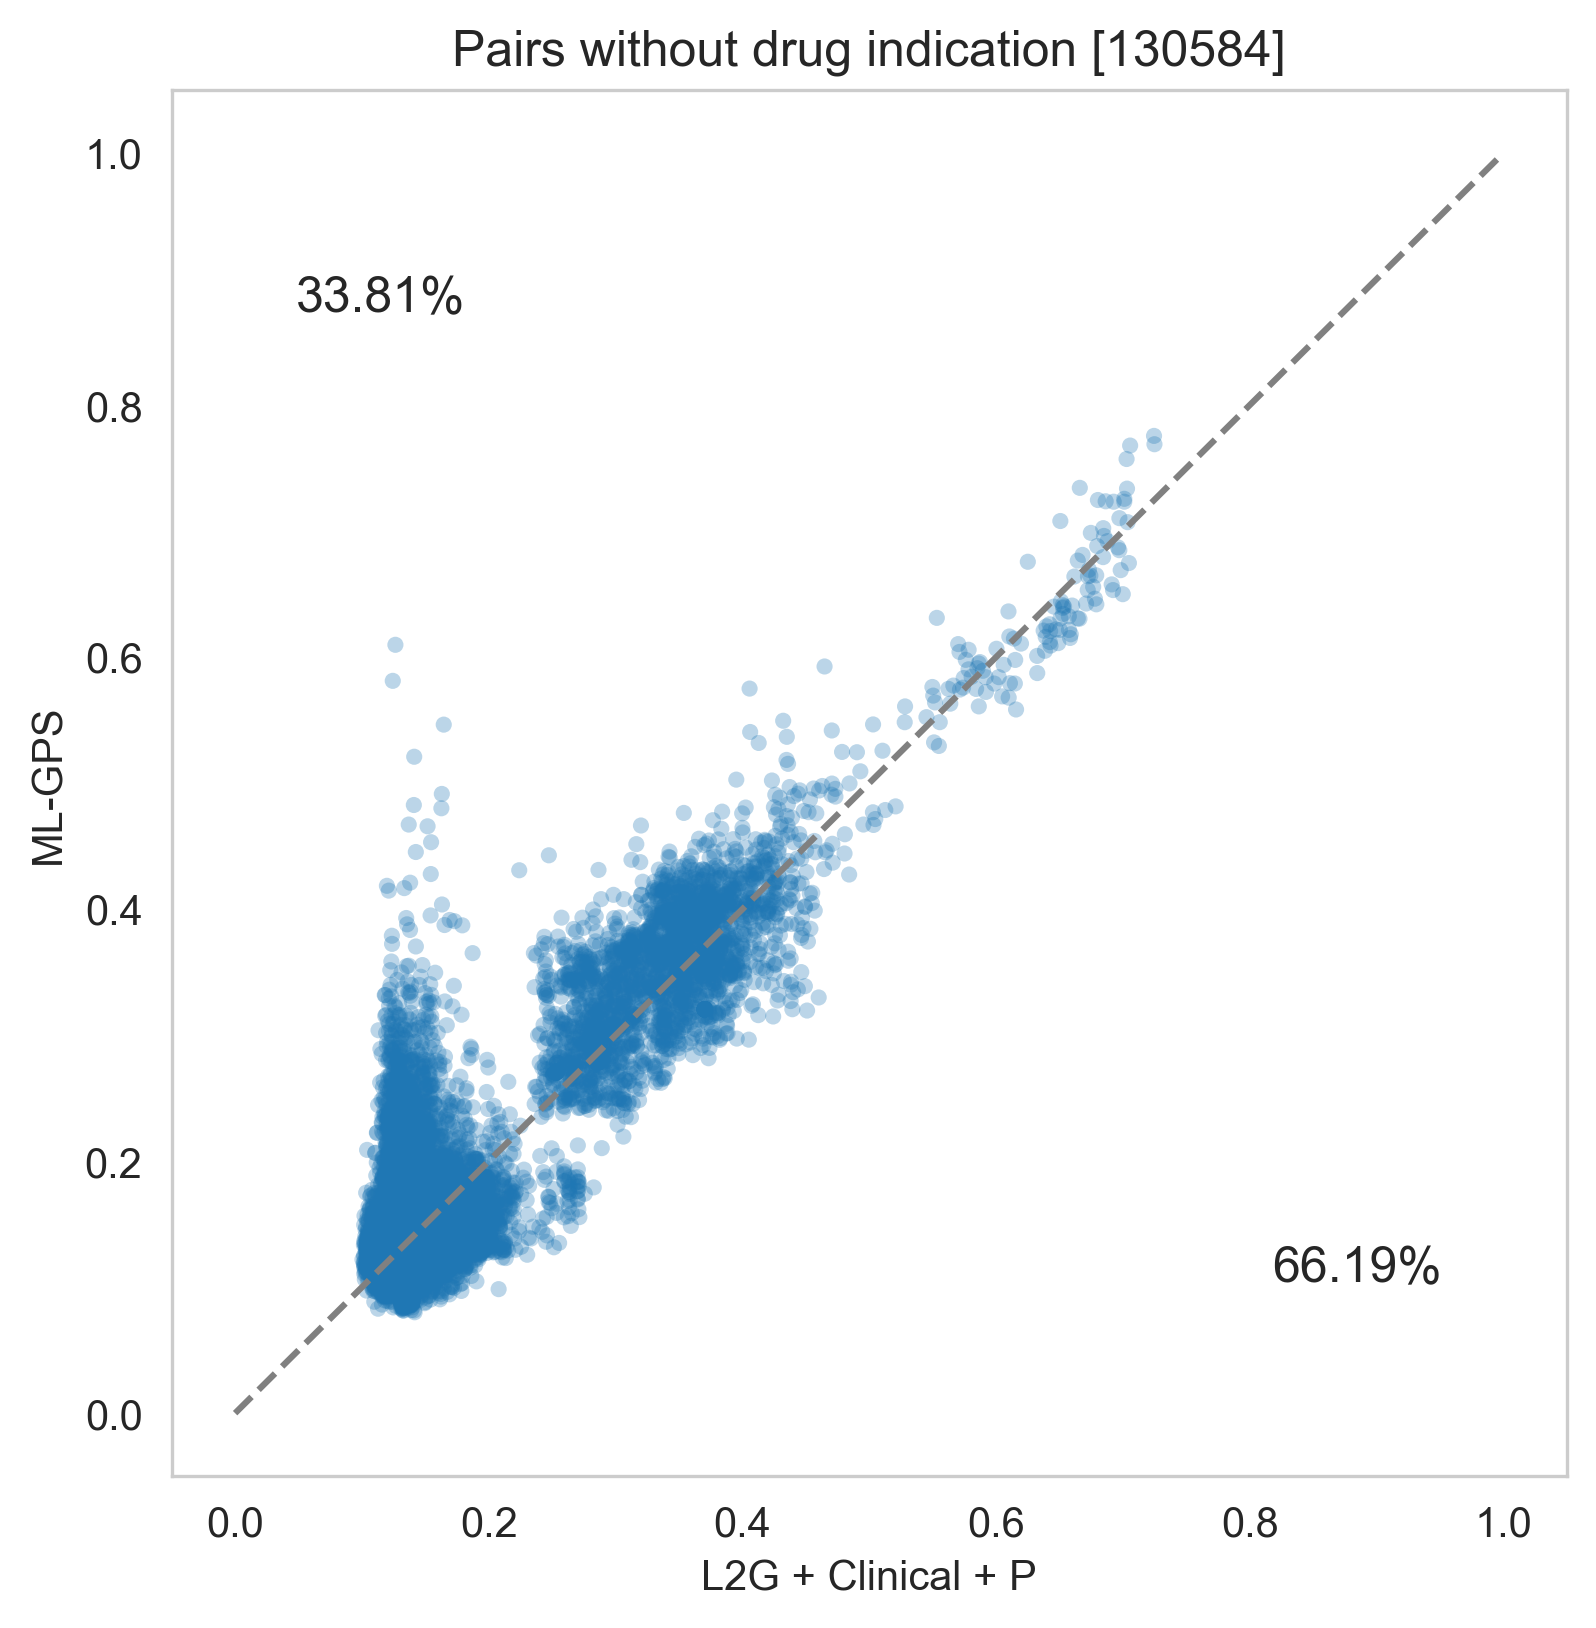

In [ ]:
sns.set_style(style='whitegrid')

temp = pred.loc[pred['indication'] == 0]

plt.figure(figsize=(6, 6), dpi=300)

plt_temp = temp.copy()
a = plt_temp.loc[((plt_temp['pcb'] < 0.15) & (plt_temp['p'] < 0.15))]
b = plt_temp.loc[~((plt_temp['pcb'] < 0.15) & (plt_temp['p'] < 0.15))]
plt_temp = pd.concat([a,b])

sns.scatterplot(data=plt_temp, x='p', y='pcb', alpha=0.3, edgecolor='none', s=15)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

above_line = ((temp['pcb'] - temp['p']) > 0).mean() * 100
below_line = ((temp['pcb'] - temp['p']) < 0).mean() * 100

plt.text(0.15, 0.85, f'{above_line:.2f}%', transform=plt.gca().transAxes, ha='center', va='center', fontsize=12)
plt.text(0.85, 0.15, f'{below_line:.2f}%', transform=plt.gca().transAxes, ha='center', va='center', fontsize=12)

plt.ylabel('ML-GPS')
plt.xlabel('L2G + Clinical + P')

plt.title(f'Pairs without drug indication [{len(temp)}]')

plt.grid(False)
plt.show()

## Supporting evidence (direct and indirect association scores)

In [ ]:
pred = pd.read_pickle('./Outputs/pred.pkl').sort_values('pcb', ascending=False)
pred['diff'] = (pred['pcb']-pred['p'])/pred['p']

pred_p = pred[['g-p','p','direct','direct_score','direct_count','indirect','indirect_score','indirect_count','diff']].rename({'p':'pred'},axis=1)
pred_pcb = pred[['g-p','pcb','direct','direct_score','direct_count','indirect','indirect_score','indirect_count','diff']].rename({'pcb':'pred'},axis=1)
pred_p['model'] = 'P'
pred_pcb['model'] = 'PCB'

bins = [0, 0.2, 0.4, 0.6, 1.1]  # Note the last edge is set to 1.1 to include all values >= 0.6
bin_labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '≥ 0.6']

pred_p['bin'] = pd.cut(pred_p['pred'], bins=bins, labels=bin_labels, right=False)
pred_pcb['bin'] = pd.cut(pred_pcb['pred'], bins=bins, labels=bin_labels, right=False)
pc = pd.concat([pred_p, pred_pcb])

temp = pred_pcb.loc[(pred_pcb['diff'] <= 0.1)]
t_01 = temp.groupby('bin')['direct'].mean().reset_index()\
    .merge(temp.groupby('bin')['indirect'].mean().reset_index())\
    .merge(temp.groupby('bin')['model'].count().reset_index())
t_01['diff'] = '≤ 10%'
temp = pred_pcb.loc[(pred_pcb['diff'] > 0.1) & (pred_pcb['diff'] <= 0.2)]
t_12 = temp.groupby('bin')['direct'].mean().reset_index()\
    .merge(temp.groupby('bin')['indirect'].mean().reset_index())\
    .merge(temp.groupby('bin')['model'].count().reset_index())
t_12['diff'] = '10-20%'
temp = pred_pcb.loc[(pred_pcb['diff'] > 0.2) & (pred_pcb['diff'] <= 0.3)]
t_23 = temp.groupby('bin')['direct'].mean().reset_index()\
    .merge(temp.groupby('bin')['indirect'].mean().reset_index())\
    .merge(temp.groupby('bin')['model'].count().reset_index())
t_23['diff'] = '20-30%'
temp = pred_pcb.loc[(pred_pcb['diff'] > 0.3)]
t_3r = temp.groupby('bin')['direct'].mean().reset_index()\
    .merge(temp.groupby('bin')['indirect'].mean().reset_index())\
    .merge(temp.groupby('bin')['model'].count().reset_index())
t_3r['diff'] = '> 30%'
dp = pd.concat([t_01,t_12,t_23,t_3r]).reset_index(drop=True)
dp = dp.dropna()

def convert_to_k_m(x):
    if x > 999999:
        return f"{round(x / 1000000)}m"
    elif x > 999:
        return f"{round(x / 1000)}k"
    else:
        return str(x)

dp['count'] = dp['model'].apply(convert_to_k_m)

print(dp.groupby('diff')['model'].sum())
dp = dp.loc[dp['model'] != 3]


diff
10-20%     144700
20-30%      48366
> 30%       34735
≤ 10%     2134923
Name: model, dtype: int64


/var/folders/yr/y10yd09d6pg7yv_8hdtwsgf80000gn/T/ipykernel_43727/501749482.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t_01 = temp.groupby('bin')['direct'].mean().reset_index()\
/var/folders/yr/y10yd09d6pg7yv_8hdtwsgf80000gn/T/ipykernel_43727/501749482.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .merge(temp.groupby('bin')['indirect'].mean().reset_index())\
/var/folders/yr/y10yd09d6pg7yv_8hdtwsgf80000gn/T/ipykernel_43727/501749482.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current b

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

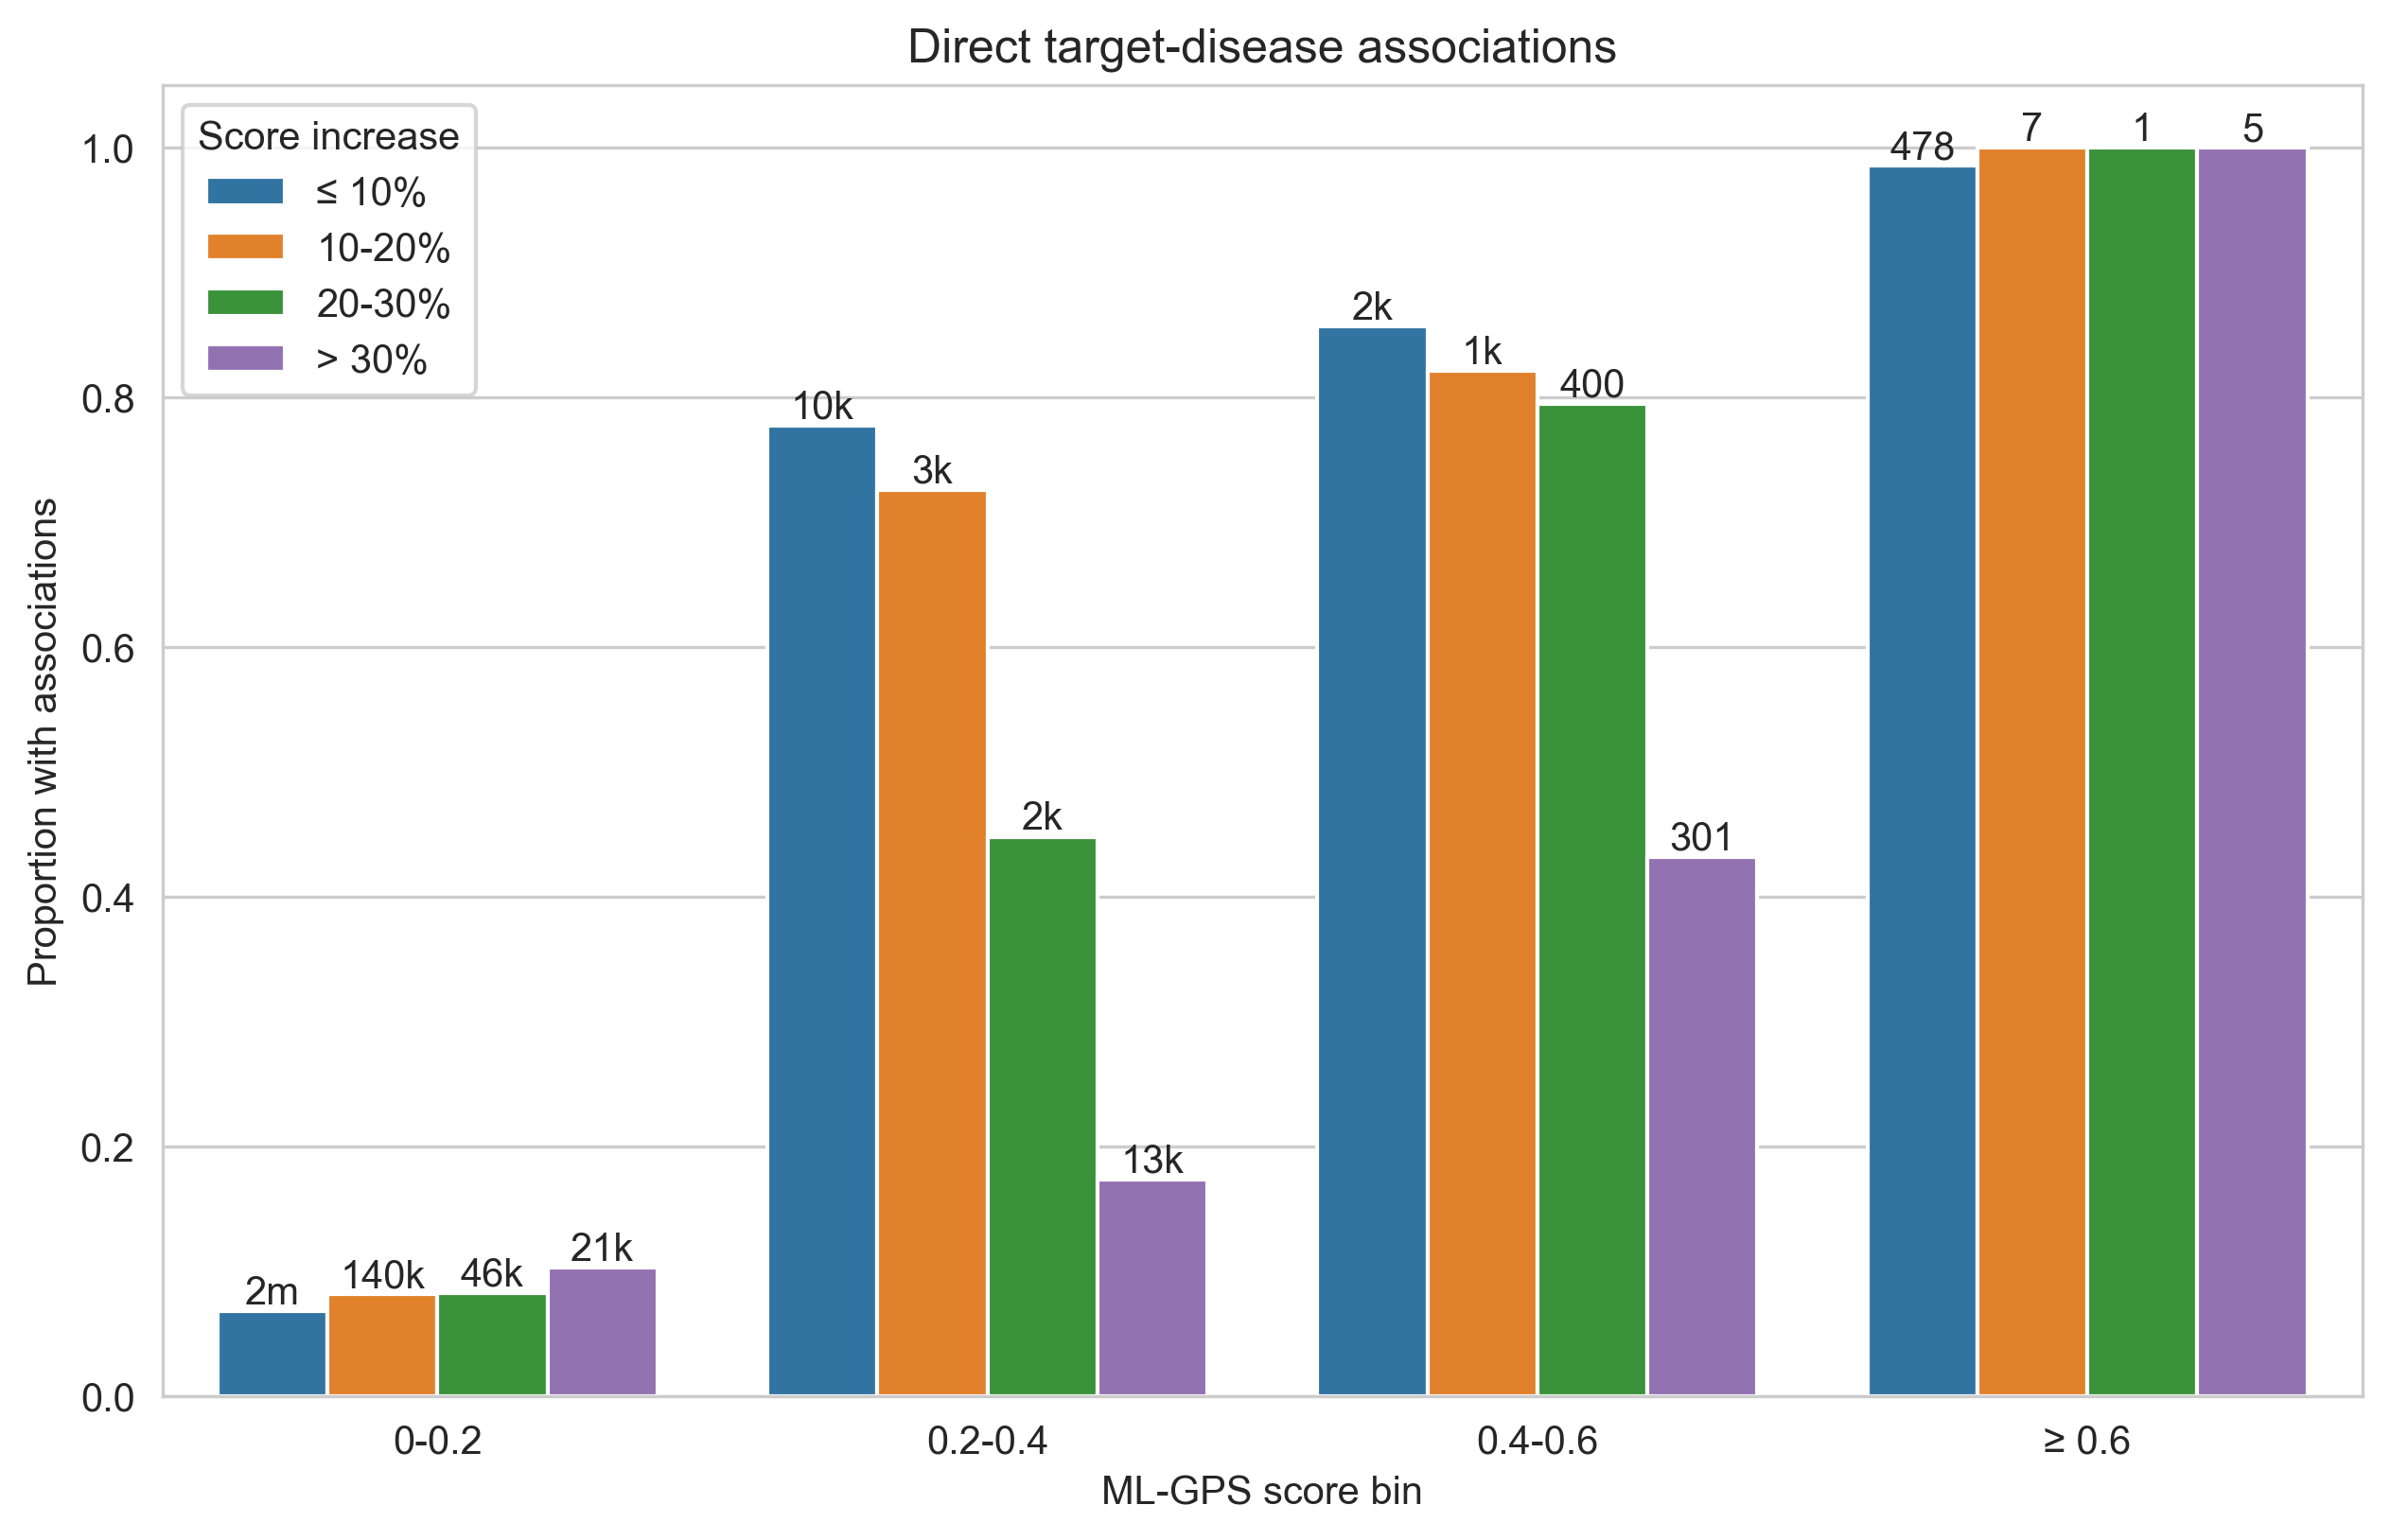

In [44]:
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
skip_red_color = [color for color in color_cycle if color != '#d62728']  # Exclude red

plt.figure(figsize=(10, 6), dpi=300)

tp = dp.copy()
tp['bin'] = tp['bin'].astype(str)

sns.set_style(style='whitegrid')

# Use the color palette based on the cycle excluding red
palette = skip_red_color[:tp['diff'].nunique()]

ax = sns.barplot(tp, x='bin', y='direct', hue='diff', palette=palette)

for p, count in zip(ax.patches, tp['count']):
    ax.annotate(count, xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

ax.legend(title='Score increase')
plt.title('Direct target-disease associations')
plt.xlabel('ML-GPS score bin')
plt.ylabel('Proportion with associations')

plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

Text(0, 0.5, 'Proportion with associations')

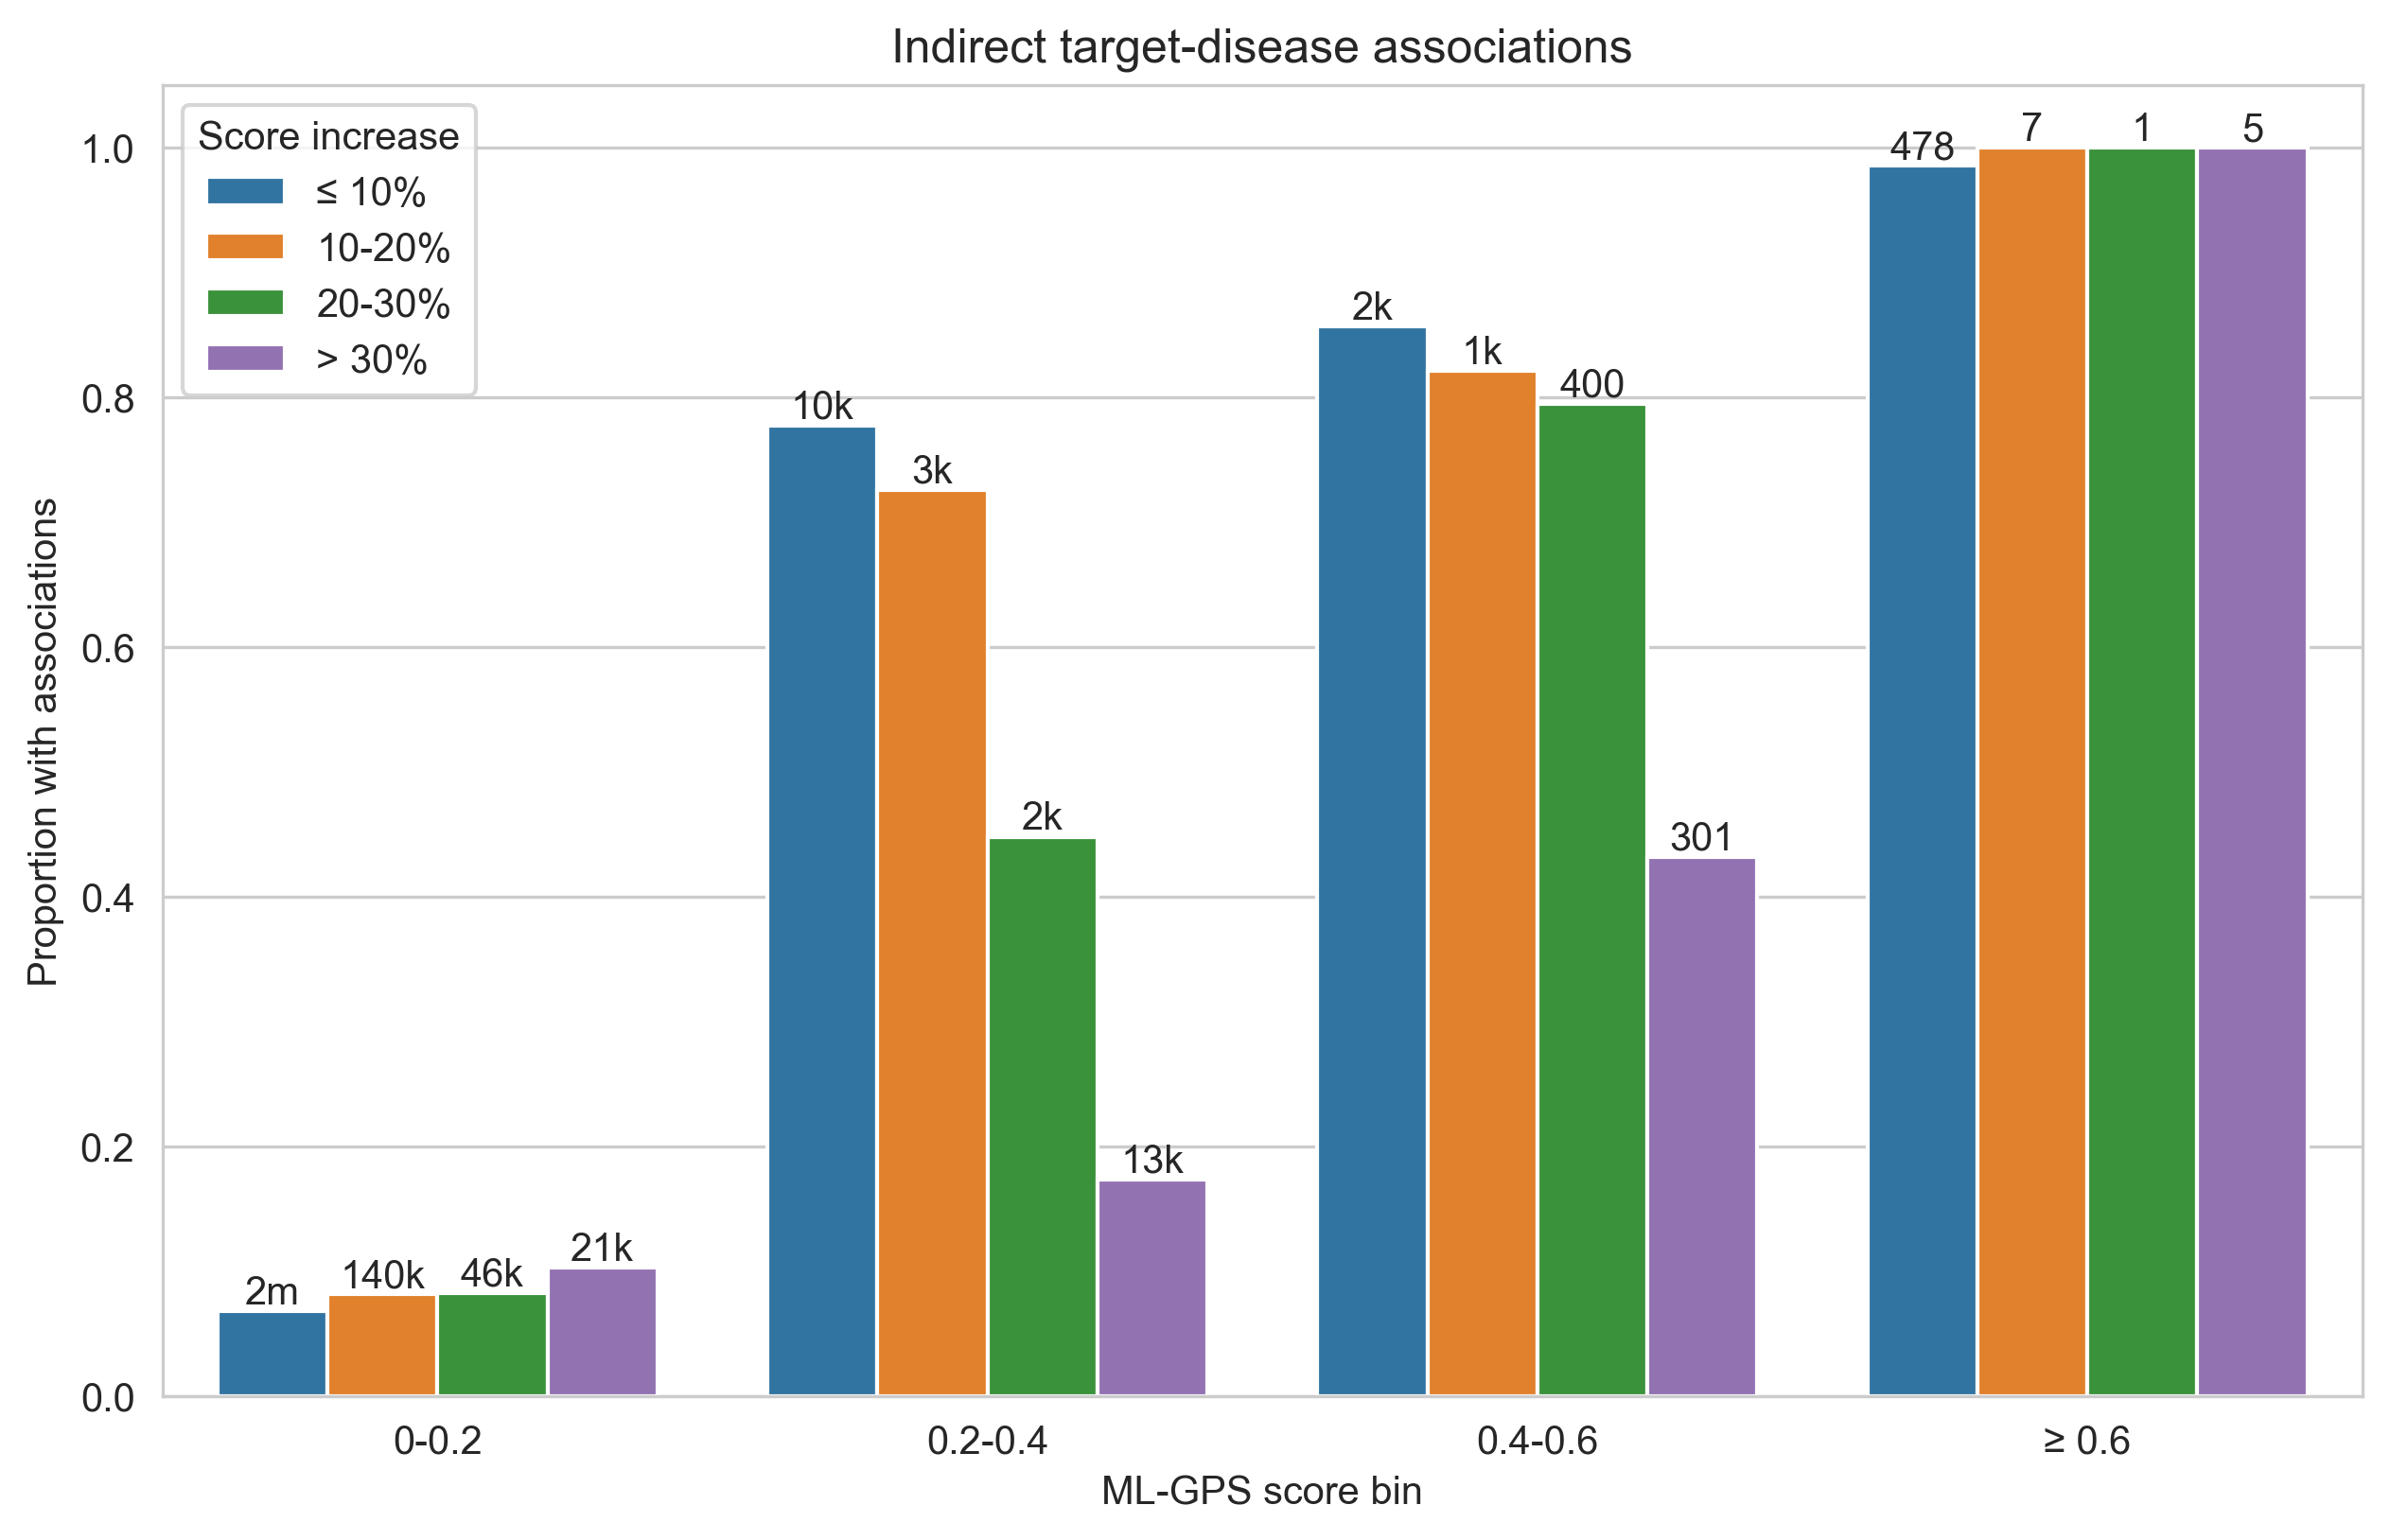

In [45]:
plt.figure(figsize=(10, 6), dpi=300)

sns.set_style(style='whitegrid')

palette = skip_red_color[:tp['diff'].nunique()]

ax = sns.barplot(tp, x='bin', y='indirect', hue='diff', palette=palette)

num_bars = tp['diff'].nunique()
for p,count in zip(ax.patches, tp['count']):
    ax.annotate(count, xy=(p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=10)
    
ax.legend(title='Score increase')
plt.title('Indirect target-disease associations')
plt.xlabel('ML-GPS score bin')
plt.ylabel('Proportion with associations')

## ssGSEA

In [ ]:
pd.DataFrame.iteritems = pd.DataFrame.items

phecodes = pd.read_excel('./Phecode/phecode_counts_v2.xlsx')
ps = phecodes[['phecode','phecode_string']]
phecodes = phecodes.loc[phecodes['include'] == 'Y']['phecode']
pred = pd.read_pickle('./Outputs/pred.pkl').sort_values('pcb', ascending=False).fillna(0)

for phecode in phecodes:
    temp_pcb = pred.loc[pred['phecode'] == phecode][['gene','pcb']].set_axis([0,1],axis=1)
    temp_pcb = temp_pcb.set_axis(labels=temp_pcb[0]).drop(0,axis=1).squeeze()
    temp_p = pred.loc[pred['phecode'] == phecode][['gene','p']].set_axis([0,1],axis=1)
    temp_p = temp_p.set_axis(labels=temp_p[0]).drop(0,axis=1).squeeze()
    ss_pcb = gp.ssgsea(data=temp_pcb,
                   gene_sets='./Raw files/h.all.v2023.2.Hs.symbols.gmt', no_plot=True)
    ss_p = gp.ssgsea(data=temp_p,
                   gene_sets='./Raw files/h.all.v2023.2.Hs.symbols.gmt', no_plot=True)
    ss_pcb = ss_pcb.res2d.reset_index()[['Term','NES']].set_axis(['Term','NES_pcb'],axis=1)
    ss_p = ss_p.res2d.reset_index()[['Term','NES']].set_axis(['Term','NES_p'],axis=1)
    output = ss_pcb.merge(ss_p, on='Term', how='outer')
    output.to_csv(f'./Outputs/GSEA/{phecode}.csv', index=False)

In [ ]:
gmt_file_path = './Raw files/h.all.v2023.2.Hs.symbols.gmt'
with open(gmt_file_path, 'r') as file:
    data = [line.strip().split('\t') for line in file]
msig = pd.DataFrame(
    [(gene, pathway[0].replace('HALLMARK_', ''), 1) for pathway in data for gene in pathway[2:]],
    columns=['gene', 'pathway', 'value']
)

results = pd.DataFrame()
for phecode in phecodes:
    output = pd.read_csv(f'./Outputs/GSEA/{phecode}.csv')
    output['phecode'] = phecode
    results = pd.concat([results,output])
    
results = results.merge(ps, how='left')
results['diff'] = results['NES_pcb'] - results['NES_p']

temp = pred[['phecode','gene','p','pcb']].merge(msig[['gene','pathway']], on='gene',how='left')
temp = temp.sort_values('pcb',ascending=False).drop_duplicates(['phecode','pathway'])
temp['Term'] = 'HALLMARK_' + temp['pathway']
temp = temp[['phecode','Term','gene','pcb']]
results = results.merge(temp,how='left').sort_values('NES_pcb',ascending=False)
results.to_pickle('./Outputs/GSEA/results.pkl')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 1.0, 'MSigDB hallmark gene sets')

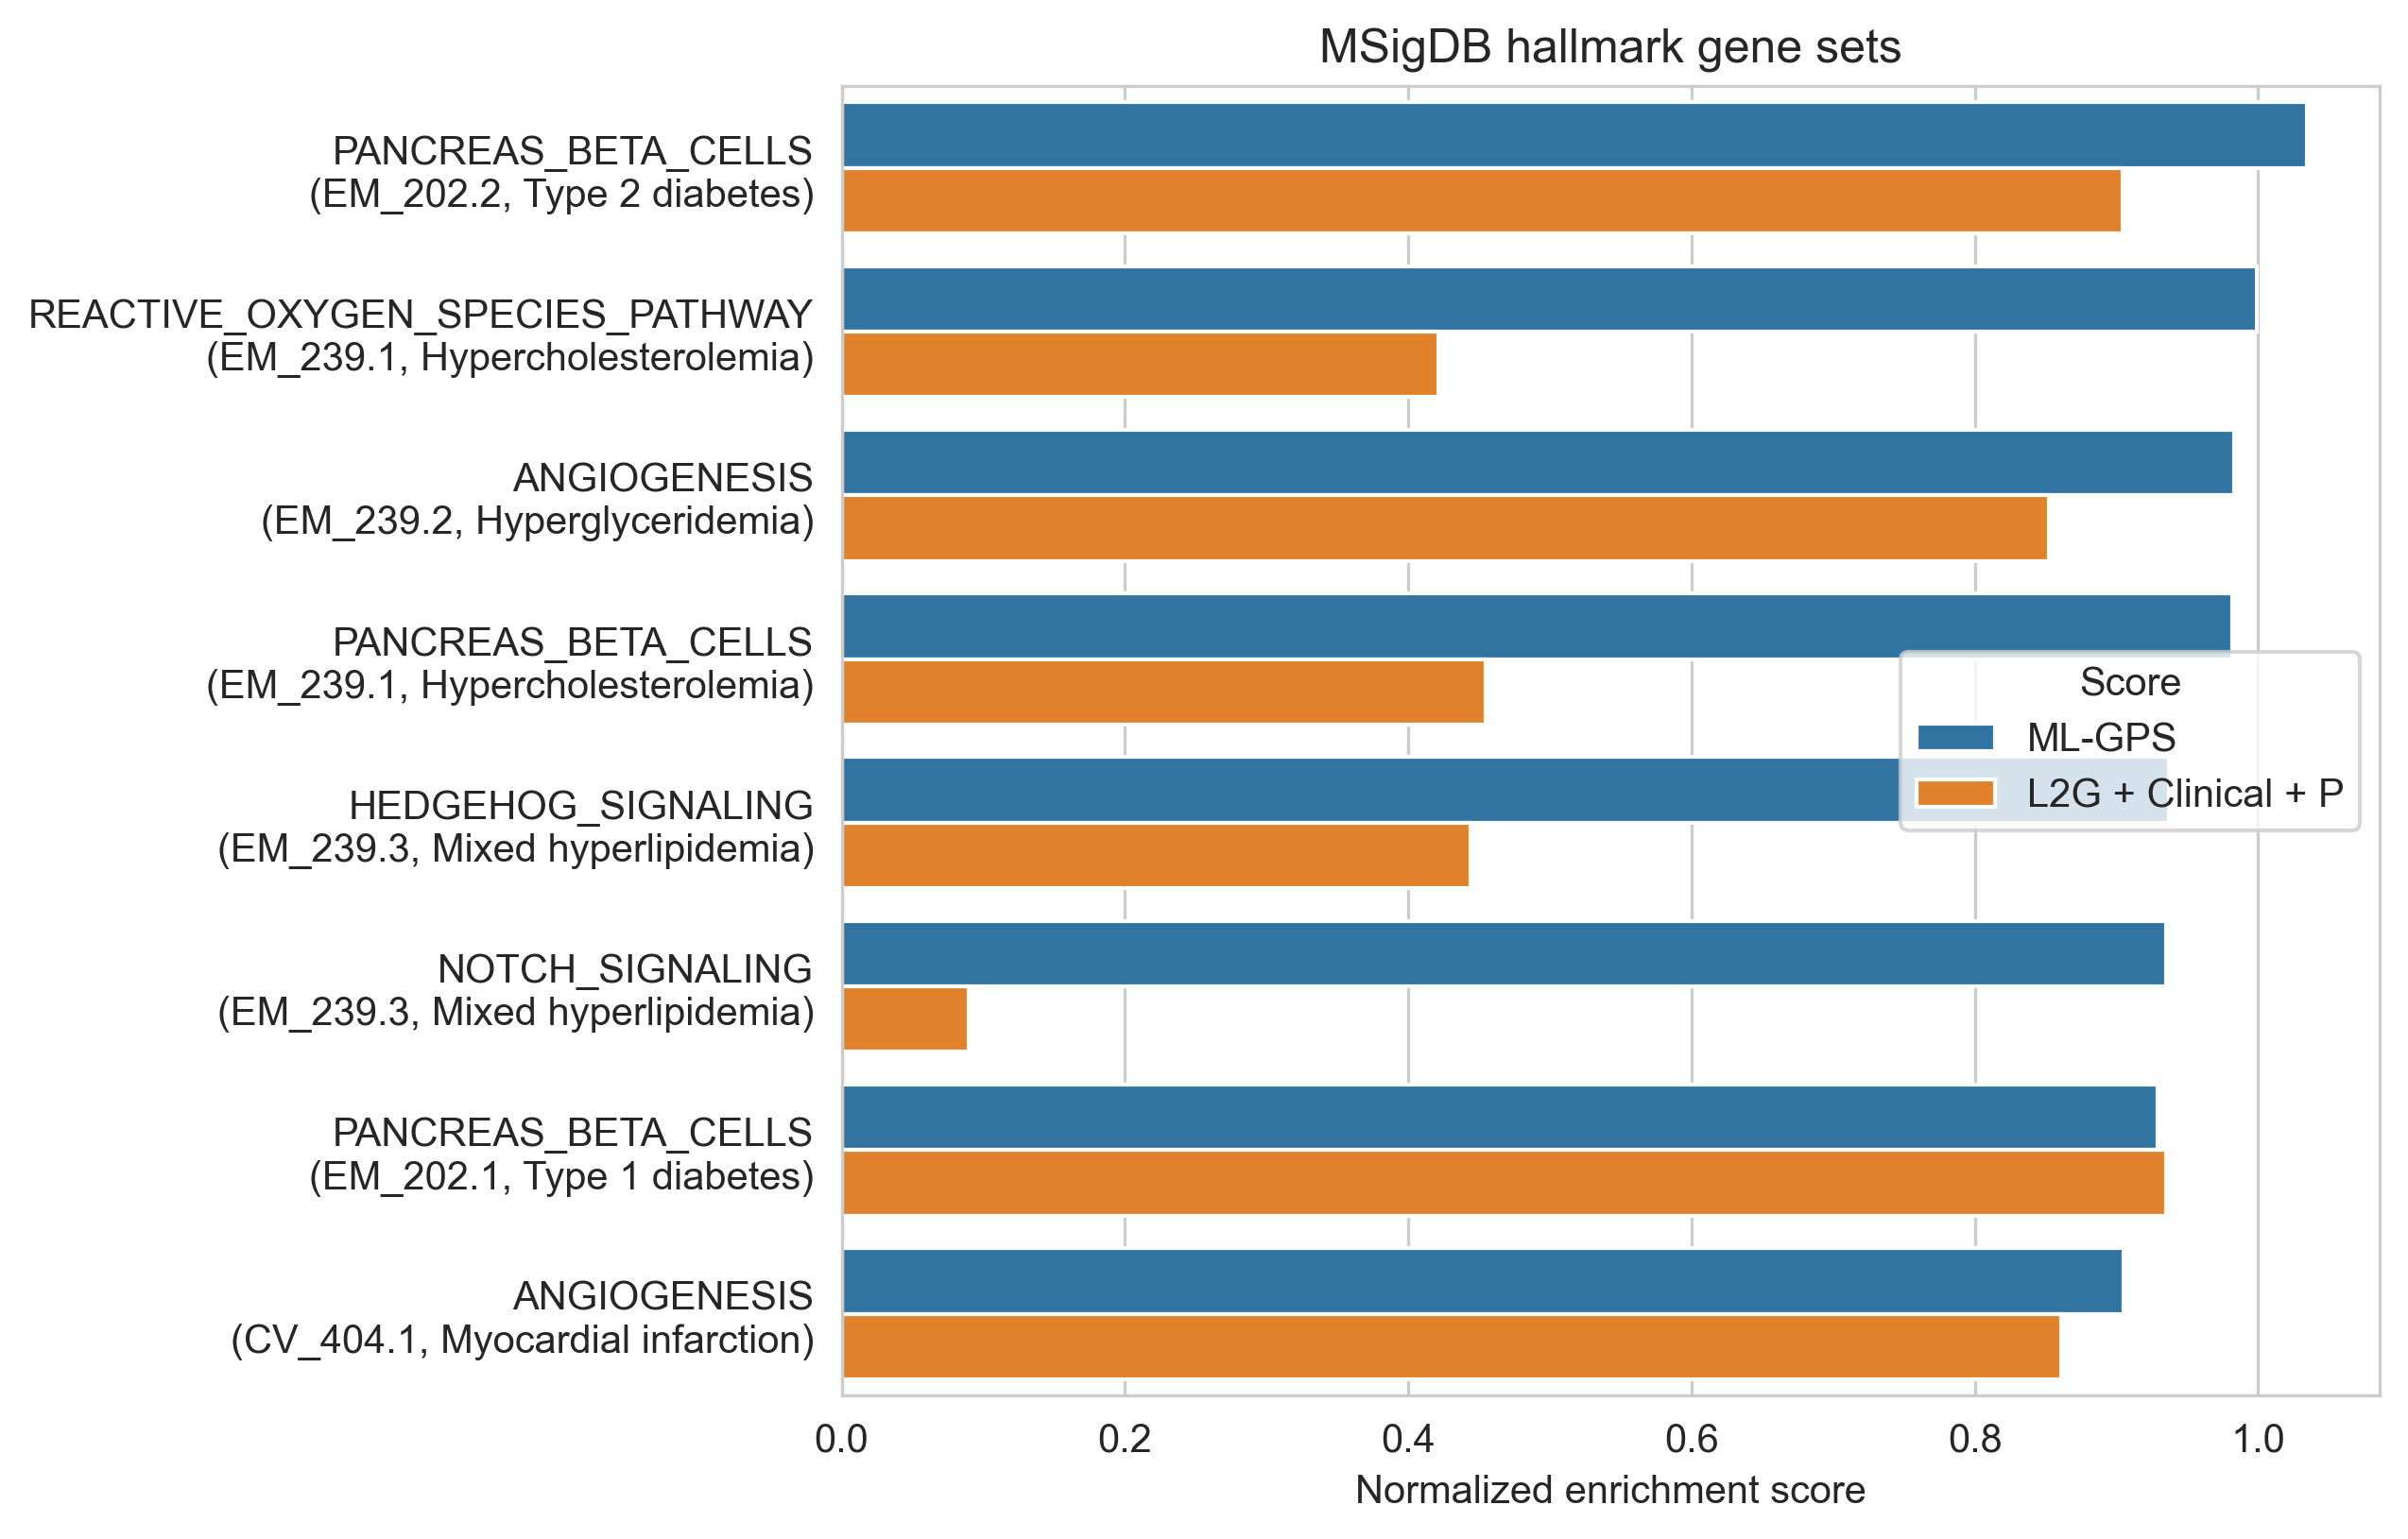

In [62]:
results = pd.read_pickle('./Outputs/GSEA/results.pkl')

a = results.sort_values('NES_pcb', ascending=False)
b = results.loc[results['NES_p'] <= 0].sort_values('NES_pcb', ascending=False)
c = results.sort_values('diff', ascending=False)

a['phecode_string'] = a['phecode_string'].str.replace(' [Atherosclerotic heart disease]','')
a['phecode_string'] = a['phecode_string'].str.replace(' [Heart attack]','')
a['plt_string'] = a['Term'].str.replace('HALLMARK_', '') + '\n(' + a['phecode'] + ', ' + a['phecode_string'] + ')' 
a_plt = pd.concat([a[['plt_string','NES_pcb']].rename({'NES_pcb':'NES'},axis=1).assign(Score='ML-GPS'),\
           a[['plt_string','NES_p']].rename({'NES_p':'NES'},axis=1).assign(Score='L2G + Clinical + P')])
a_plt = pd.concat([a_plt[:8], a_plt[5600:5608]])

sns.set_style(style='whitegrid')
plt.figure(figsize=(7, 6), dpi=300)
sns.barplot(a_plt, x='NES', y='plt_string', hue='Score')

plt.ylabel('')
plt.xlabel('Normalized enrichment score')
plt.title(f'MSigDB hallmark gene sets')

## Manual annotation output

In [ ]:
phecodes = pd.read_excel('./Phecode/phecode_counts_v2.xlsx')
phecodes = phecodes.loc[phecodes['include'] == 'Y']['phecode']

sdu = pd.read_csv('./Datasets/sider_input.csv')
sdu = sdu.loc[sdu['phecode'].isin(phecodes)]
sdu['g-p'] = sdu['gene'] + sdu['phecode']
sdu = sdu.sort_values('phase',ascending=False).drop_duplicates('g-p')
st = sdu[['g-p','indication','phase']].rename({'indication':'SIDER indication','phase':'SIDER phase'},axis=1)

otu = pd.read_csv('./Datasets/ot_input.csv')
otu = otu.loc[otu['phecode'].isin(phecodes)]
otu['g-p'] = otu['gene'] + otu['phecode']
otu = otu.sort_values('phase',ascending=False).drop_duplicates('g-p')
ot = otu[['g-p','indication','phase']].rename({'indication':'Open Targets indication','phase':'Open Targets phase'},axis=1)

In [ ]:
pred = pd.read_pickle('./Hits/pred.pkl').sort_values('pcb', ascending=False).reset_index(drop=True)
pred = pred.fillna(0)
pred['diff'] = (pred['pcb']-pred['p'])/pred['p']

phecodes = pd.read_excel('./Phecode/phecode_counts_v2.xlsx')
phecodes = phecodes.loc[phecodes['include'] == 'Y'][['phecode','phecode_string']]
pred = pred.merge(phecodes,on='phecode')

pred = pred.merge(st, on='g-p', how='left').merge(ot, on='g-p', how='left')
pred = pred.drop(['g-p','p_none','p_inh','p_act','pcb_none','direct','indirect',\
                  'direct_count','indirect_count','diff'],axis=1)
pred = pred[['gene','phecode','phecode_string','pcb','pcb_act','pcb_inh',\
 'indication', 'phase', 'activator', 'inhibitor',\
 'Open Targets indication','Open Targets phase','SIDER indication','SIDER phase',\
 'direct_score', 'indirect_score']]
pred = pred.set_axis(['Gene','Phecode','Phecode description','ML-GPS','ML-GPS DOE (activator)',\
                     'ML-GPS DOE (inhibitor)','Any indication','Maximum phase','Activator indication',
                     'Inhibitor indication',
                     'Open Targets indication','Open Targets phase','SIDER indication','SIDER phase',
                     'Open Targets direct association score','Open Targets indirect association score'],axis=1)
pred = pred.fillna(0).sort_values('ML-GPS', ascending=False).reset_index(drop=True)

pred.to_csv('./Final predictions/ML-GPS scores.csv', index=False)
pred.sort_values('ML-GPS',ascending=False)[:(int(len(pred)*0.10))].to_csv('./Final predictions/ML-GPS scores (top 10%).csv', index=False)

In [ ]:
agp = pd.read_csv('./Datasets/all_gp.csv')
agp = agp.merge(phecodes,on='phecode')
agp = agp[['gene','phecode','phecode_string','EVA_count','HGMD_count','OMIM_count','l2g_score',\
     'p_g_z','p_e_z','p_b_z','b_g_z','b_e_z','b_b_z','c_g_z','c_e_z','c_g_z']]
agp = agp.set_axis(['Gene','Phecode','Phecode description','EVA','HGMD','OMIM','L2G',
                    'P common','P rare','P ultra-rare','B common','B rare','B ultra-rare','C common','C rare','C ultra-rare'],axis=1)
agp = agp.merge(pred[['Gene','Phecode','ML-GPS']], on=['Gene','Phecode'])
agp = agp.sort_values('ML-GPS',ascending=False).reset_index(drop=True)

agp = agp[['Gene','Phecode','Phecode description','ML-GPS','EVA','HGMD','OMIM','L2G',
                    'P common','P rare','P ultra-rare','B common','B rare','B ultra-rare','C common','C rare','C ultra-rare']]

agp.to_csv('./Final predictions/ML-GPS features.csv', index=False)
agp.sort_values('ML-GPS',ascending=False)[:(int(len(pred)*0.10))].to_csv('./Final predictions/ML-GPS features (top 10%).csv', index=False)

In [ ]:
agp = pd.read_csv('./Datasets/all_gp.csv')
agp = agp.merge(phecodes,on='phecode')
agp = agp[['gene','phecode','phecode_string',
          'EVA_act','EVA_inh','EVA_neu','HGMD_act', 'HGMD_inh', 'HGMD_neu','OMIM_act', 'OMIM_inh', 'OMIM_neu',
          'l2g_act','l2g_inh','l2g_neu',
           'p_g_act','p_g_inh','p_e_act','p_e_inh','p_e_neu','p_b_act','p_b_inh',
           'b_g_act','b_g_inh','b_e_act','b_e_inh','b_e_neu','b_b_act','b_b_inh',
           'c_g_act','c_g_inh','c_e_act','c_e_inh','c_e_neu','c_b_act','c_b_inh']]
agp = agp.set_axis(['Gene','Phecode','Phecode description',
                    'EVA (act.)','EVA (inh.)','EVA (neu.)',
                   'HGMD (act.)','HGMD (inh.)','HGMD (neu.)',
                   'OMIM (act.)','OMIM (inh.)','OMIM (neu.)',
                   'L2G (act.)','L2G (inh.)','L2G (neu.)',
                   'P common (act.)','P common (inh.)','P rare (act.)','P rare (inh.)','P rare (neu.)','P ultra-rare (act.)','P ultra-rare (inh.)',
                   'B common (act.)','B common (inh.)','B rare (act.)','B rare (inh.)','B rare (neu.)','B ultra-rare (act.)','B ultra-rare (inh.)',
                   'C common (act.)','C common (inh.)','C rare (act.)','C rare (inh.)','C rare (neu.)','C ultra-rare (act.)','C ultra-rare (inh.)'],axis=1)
agp = agp.merge(pred[['Gene','Phecode','ML-GPS','ML-GPS DOE (activator)','ML-GPS DOE (inhibitor)']],on=['Gene','Phecode'])
agp = agp.sort_values('ML-GPS',ascending=False).reset_index(drop=True)

agp = agp[['Gene','Phecode','Phecode description','ML-GPS','ML-GPS DOE (activator)','ML-GPS DOE (inhibitor)',
                    'EVA (act.)','EVA (inh.)','EVA (neu.)',
                   'HGMD (act.)','HGMD (inh.)','HGMD (neu.)',
                   'OMIM (act.)','OMIM (inh.)','OMIM (neu.)',
                   'L2G (act.)','L2G (inh.)','L2G (neu.)',
                   'P common (act.)','P common (inh.)','P rare (act.)','P rare (inh.)','P rare (neu.)','P ultra-rare (act.)','P ultra-rare (inh.)',
                   'B common (act.)','B common (inh.)','B rare (act.)','B rare (inh.)','B rare (neu.)','B ultra-rare (act.)','B ultra-rare (inh.)',
                   'C common (act.)','C common (inh.)','C rare (act.)','C rare (inh.)','C rare (neu.)','C ultra-rare (act.)','C ultra-rare (inh.)']]

agp.to_csv('./Final predictions/ML-GPS features (DOE).csv', index=False)
agp.sort_values('ML-GPS',ascending=False)[:(int(len(pred)*0.1))].to_csv('./Final predictions/ML-GPS features (top 10%) (DOE).csv', index=False)